## Comparison of Actual Scorelines vs Poisson Expected
#### Full analysis of 120k European matches with comparison of changes with expected supremacy
13/3/2023


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson
plt.style.use('ggplot')

%matplotlib inline



##### Read csv data files from directory

In [2]:
df = pd.read_csv('C:\\Users\\Documents\\Football-Data-Combined\\Leagues_Data_Combined.csv', index_col=False)
df

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,HST,AST,HF,...,TR,HW_%,X_%,AW_%,Ov2.5_%,Un2.5_%,Exp,HG_Exp,AG_Exp,Sup Exp
0,0,I1,21/08/2021,Inter,Genoa,4.0,0.0,8.0,5.0,18.0,...,0.0,0.71,0.19,0.11,0.58,0.42,3.03,2.44,0.62,1.82
1,1,I1,21/08/2021,Verona,Sassuolo,2.0,3.0,4.0,8.0,11.0,...,1.0,0.37,0.28,0.36,0.52,0.48,2.76,1.41,1.38,0.03
2,2,I1,21/08/2021,Empoli,Lazio,1.0,3.0,5.0,5.0,13.0,...,0.0,0.20,0.24,0.55,0.56,0.44,2.94,0.94,1.97,-1.03
3,3,I1,21/08/2021,Torino,Atalanta,1.0,2.0,8.0,2.0,17.0,...,0.0,0.18,0.23,0.60,0.61,0.39,3.14,0.93,2.25,-1.32
4,4,I1,22/08/2021,Bologna,Salernitana,3.0,2.0,7.0,4.0,13.0,...,3.0,0.58,0.24,0.19,0.53,0.47,2.79,1.95,0.86,1.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121843,143652,E4,06/05/2006,Oxford,Leyton Orient,2.0,3.0,6.0,15.0,13.0,...,1.0,0.32,0.27,0.41,0.46,0.54,2.53,1.15,1.38,-0.23
121844,143653,E4,06/05/2006,Peterboro,Wycombe,0.0,2.0,7.0,5.0,10.0,...,0.0,0.49,0.27,0.24,0.47,0.53,2.56,1.60,0.96,0.64
121845,143654,E4,06/05/2006,Rushden & D,Barnet,1.0,2.0,1.0,5.0,15.0,...,0.0,0.32,0.28,0.40,0.46,0.54,2.53,1.16,1.37,-0.21
121846,143655,E4,06/05/2006,Stockport,Carlisle,0.0,0.0,7.0,2.0,13.0,...,0.0,0.41,0.27,0.31,0.49,0.51,2.62,1.43,1.17,0.26


In [3]:
df = df.drop(['Unnamed: 0'], axis=1)
df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,HST,AST,HF,AF,...,TR,HW_%,X_%,AW_%,Ov2.5_%,Un2.5_%,Exp,HG_Exp,AG_Exp,Sup Exp
0,I1,21/08/2021,Inter,Genoa,4.0,0.0,8.0,5.0,18.0,7.0,...,0.0,0.71,0.19,0.11,0.58,0.42,3.03,2.44,0.62,1.82
1,I1,21/08/2021,Verona,Sassuolo,2.0,3.0,4.0,8.0,11.0,12.0,...,1.0,0.37,0.28,0.36,0.52,0.48,2.76,1.41,1.38,0.03
2,I1,21/08/2021,Empoli,Lazio,1.0,3.0,5.0,5.0,13.0,10.0,...,0.0,0.20,0.24,0.55,0.56,0.44,2.94,0.94,1.97,-1.03
3,I1,21/08/2021,Torino,Atalanta,1.0,2.0,8.0,2.0,17.0,13.0,...,0.0,0.18,0.23,0.60,0.61,0.39,3.14,0.93,2.25,-1.32
4,I1,22/08/2021,Bologna,Salernitana,3.0,2.0,7.0,4.0,13.0,15.0,...,3.0,0.58,0.24,0.19,0.53,0.47,2.79,1.95,0.86,1.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121843,E4,06/05/2006,Oxford,Leyton Orient,2.0,3.0,6.0,15.0,13.0,15.0,...,1.0,0.32,0.27,0.41,0.46,0.54,2.53,1.15,1.38,-0.23
121844,E4,06/05/2006,Peterboro,Wycombe,0.0,2.0,7.0,5.0,10.0,15.0,...,0.0,0.49,0.27,0.24,0.47,0.53,2.56,1.60,0.96,0.64
121845,E4,06/05/2006,Rushden & D,Barnet,1.0,2.0,1.0,5.0,15.0,21.0,...,0.0,0.32,0.28,0.40,0.46,0.54,2.53,1.16,1.37,-0.21
121846,E4,06/05/2006,Stockport,Carlisle,0.0,0.0,7.0,2.0,13.0,19.0,...,0.0,0.41,0.27,0.31,0.49,0.51,2.62,1.43,1.17,0.26


##### Descriptive stats for the full dataset

In [4]:
Mean_TG = df['TG'].mean()
STD_TG = df['TG'].std()
Med_TG = df['TG'].median()
Mean_HG = df['FTHG'].mean()
Mean_AG = df['FTAG'].mean()
print('Mean Total Goals:',round(Mean_TG,2))
print('Std Total Goals:',round(STD_TG,2))
print('Median Total Goals:',Med_TG)
print('Mean Home Goals:',round(Mean_HG,2))
print('Mean Away Goals:',round(Mean_AG,2))

Mean Total Goals: 2.61
Std Total Goals: 1.64
Median Total Goals: 2.0
Mean Home Goals: 1.47
Mean Away Goals: 1.14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121848 entries, 0 to 121847
Data columns (total 31 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Div       121848 non-null  object 
 1   Date      121848 non-null  object 
 2   HomeTeam  121848 non-null  object 
 3   AwayTeam  121848 non-null  object 
 4   FTHG      121847 non-null  float64
 5   FTAG      121847 non-null  float64
 6   HST       79434 non-null   float64
 7   AST       79434 non-null   float64
 8   HF        78118 non-null   float64
 9   AF        78118 non-null   float64
 10  HC        79365 non-null   float64
 11  AC        79365 non-null   float64
 12  HY        79756 non-null   float64
 13  AY        79757 non-null   float64
 14  HR        79757 non-null   float64
 15  AR        79756 non-null   float64
 16  TG        121847 non-null  float64
 17  TST       79434 non-null   float64
 18  TF        78118 non-null   float64
 19  TC        79365 non-null   float64
 20  TY  

In [6]:
# Basic stats of dataset
round(df.describe(),2)

,FTHG,FTAG,HST,AST,HF,AF,HC,AC,HY,AY,...,TR,HW_%,X_%,AW_%,Ov2.5_%,Un2.5_%,Exp,HG_Exp,AG_Exp,Sup Exp
count,121847.00,121847.00,79434.00,79434.00,78118.00,78118.00,79365.00,79365.00,79756.00,79757.00,...,79756.00,121848.00,121848.00,121848.00,121848.00,121848.00,121848.00,121848.00,121848.00,121848.00
mean,1.47,1.14,5.07,4.14,12.85,13.29,5.65,4.62,1.70,2.00,...,0.21,0.44,0.27,0.29,0.49,0.51,2.63,1.51,1.12,0.38
std,1.24,1.11,2.74,2.43,4.55,4.64,2.92,2.62,1.31,1.37,...,0.48,0.14,0.04,0.13,0.07,0.07,0.29,0.44,0.38,0.77
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.03,0.06,0.03,0.27,0.26,1.82,0.22,0.24,-3.16
25%,1.00,0.00,3.00,2.00,10.00,10.00,4.00,3.00,1.00,1.00,...,0.00,0.35,0.26,0.21,0.44,0.47,2.44,1.24,0.88,0.00
50%,1.00,1.00,5.00,4.00,12.00,13.00,5.00,4.00,2.00,2.00,...,0.00,0.43,0.28,0.28,0.48,0.52,2.60,1.44,1.07,0.36
75%,2.00,2.00,7.00,6.00,16.00,16.00,7.00,6.00,2.00,3.00,...,0.00,0.52,0.29,0.36,0.53,0.56,2.79,1.71,1.30,0.80
max,10.00,13.00,24.00,23.00,48.00,77.00,26.00,21.00,11.00,9.00,...,10.00,0.90,0.77,0.90,0.74,0.73,3.82,3.57,3.40,3.32


In [7]:
df.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HST', 'AST',
       'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'TG', 'TST', 'TF', 'TC',
       'TY', 'TR', 'HW_%', 'X_%', 'AW_%', 'Ov2.5_%', 'Un2.5_%', 'Exp',
       'HG_Exp', 'AG_Exp', 'Sup Exp'],
      dtype='object')

In [8]:
print(df.isnull().sum()) # check number of missing values

Div             0
Date            0
HomeTeam        0
AwayTeam        0
FTHG            1
FTAG            1
HST         42414
AST         42414
HF          43730
AF          43730
HC          42483
AC          42483
HY          42092
AY          42091
HR          42091
AR          42092
TG              1
TST         42414
TF          43730
TC          42483
TY          42092
TR          42092
HW_%            0
X_%             0
AW_%            0
Ov2.5_%         0
Un2.5_%         0
Exp             0
HG_Exp          0
AG_Exp          0
Sup Exp         0
dtype: int64


In [9]:
df.shape

(121848, 31)

In [10]:
# Collate required columns
df_score = df[['FTHG', 'FTAG', 'HW_%', 'AW_%']]

#### Number and % of games finishing at set scorelines

In [11]:
df1_0 = df[((df['FTHG'] == 1) & (df['FTAG'] == 0))]
df2_0 = df[((df['FTHG'] == 2) & (df['FTAG'] == 0))]
df2_1 = df[((df['FTHG'] == 2) & (df['FTAG'] == 1))]
df3_0 = df[((df['FTHG'] == 3) & (df['FTAG'] == 0))]
df3_1 = df[((df['FTHG'] == 3) & (df['FTAG'] == 1))]
df3_2 = df[((df['FTHG'] == 3) & (df['FTAG'] == 2))]

df0_0 = df[((df['FTHG'] == 0) & (df['FTAG'] == 0))]
df1_1 = df[((df['FTHG'] == 1) & (df['FTAG'] == 1))]
df2_2 = df[((df['FTHG'] == 2) & (df['FTAG'] == 2))]
df3_3 = df[((df['FTHG'] == 3) & (df['FTAG'] == 3))]
df4_4 = df[((df['FTHG'] == 4) & (df['FTAG'] == 4))]

df0_1 = df[((df['FTHG'] == 0) & (df['FTAG'] == 1))]
df0_2 = df[((df['FTHG'] == 0) & (df['FTAG'] == 2))]
df1_2 = df[((df['FTHG'] == 1) & (df['FTAG'] == 2))]
df0_3 = df[((df['FTHG'] == 0) & (df['FTAG'] == 3))]
df1_3 = df[((df['FTHG'] == 1) & (df['FTAG'] == 3))]
df2_3 = df[((df['FTHG'] == 2) & (df['FTAG'] == 3))]

print('Total games finishing 1-0: ', len(df1_0), '',round((len(df1_0)/len(df)),3))
print('Total games finishing 2-0: ', len(df2_0), '',round((len(df2_0)/len(df)),3))
print('Total games finishing 2-1: ', len(df2_1), '',round((len(df2_1)/len(df)),3))
print('Total games finishing 3-0: ', len(df3_0), '',round((len(df3_0)/len(df)),3))
print('Total games finishing 3-1: ', len(df3_1), '',round((len(df3_1)/len(df)),3))
print('Total games finishing 3-2: ', len(df3_2), '',round((len(df3_2)/len(df)),3))
print('')
print('Total games finishing 0-0: ', len(df0_0), '',round((len(df0_0)/len(df)),3))
print('Total games finishing 1-1: ', len(df1_1), '',round((len(df1_1)/len(df)),3))
print('Total games finishing 2-2: ', len(df2_2), '',round((len(df2_2)/len(df)),3))
print('Total games finishing 3-3: ', len(df3_3), '',round((len(df3_3)/len(df)),3))
print('Total games finishing 4-4: ', len(df4_4), ' ',round((len(df4_4)/len(df)),3))
print('')
print('Total games finishing 0-1: ', len(df0_1), '',round((len(df0_1)/len(df)),3))
print('Total games finishing 0-2: ', len(df0_2), '',round((len(df0_2)/len(df)),3))
print('Total games finishing 1-2: ', len(df1_2), '',round((len(df1_2)/len(df)),3))
print('Total games finishing 0-3: ', len(df0_3), '',round((len(df0_3)/len(df)),3))
print('Total games finishing 1-3: ', len(df1_3), '',round((len(df1_3)/len(df)),3))
print('Total games finishing 2-3: ', len(df2_3), '',round((len(df2_3)/len(df)),3))

Total games finishing 1-0:  13014  0.107
Total games finishing 2-0:  9624  0.079
Total games finishing 2-1:  10752  0.088
Total games finishing 3-0:  4930  0.04
Total games finishing 3-1:  5009  0.041
Total games finishing 3-2:  2928  0.024

Total games finishing 0-0:  9823  0.081
Total games finishing 1-1:  15228  0.125
Total games finishing 2-2:  6204  0.051
Total games finishing 3-3:  1147  0.009
Total games finishing 4-4:  119   0.001

Total games finishing 0-1:  9435  0.077
Total games finishing 0-2:  5713  0.047
Total games finishing 1-2:  8035  0.066
Total games finishing 0-3:  2491  0.02
Total games finishing 1-3:  3219  0.026
Total games finishing 2-3:  2262  0.019


#### % of set scorelines expected by poisson distribution

In [12]:
avg_hg = df['FTHG'].mean()
avg_ag = df['FTAG'].mean()
avg_tg = df['TG'].mean()

score_1_0 = poisson.pmf(1, avg_hg) * poisson.pmf(0, avg_ag)
score_2_0 = poisson.pmf(2, avg_hg) * poisson.pmf(0, avg_ag)
score_2_1 = poisson.pmf(2, avg_hg) * poisson.pmf(1, avg_ag)
score_3_0 = poisson.pmf(3, avg_hg) * poisson.pmf(0, avg_ag)
score_3_1 = poisson.pmf(3, avg_hg) * poisson.pmf(1, avg_ag)
score_3_2 = poisson.pmf(3, avg_hg) * poisson.pmf(2, avg_ag)

score_0_0 = poisson.pmf(0, avg_hg) * poisson.pmf(0, avg_ag)
score_1_1 = poisson.pmf(1, avg_hg) * poisson.pmf(1, avg_ag)
score_2_2 = poisson.pmf(2, avg_hg) * poisson.pmf(2, avg_ag)
score_3_3 = poisson.pmf(3, avg_hg) * poisson.pmf(3, avg_ag)
score_4_4 = poisson.pmf(4, avg_hg) * poisson.pmf(4, avg_ag)


score_0_1 = poisson.pmf(0, avg_hg) * poisson.pmf(1, avg_ag)
score_0_2 = poisson.pmf(0, avg_hg) * poisson.pmf(2, avg_ag)
score_1_2 = poisson.pmf(1, avg_hg) * poisson.pmf(2, avg_ag)
score_0_3 = poisson.pmf(1, avg_hg) * poisson.pmf(3, avg_ag)
score_1_3 = poisson.pmf(1, avg_hg) * poisson.pmf(3, avg_ag)
score_2_3 = poisson.pmf(2, avg_hg) * poisson.pmf(3, avg_ag)

print('Poisson expected % of 1-0 from TOTAL matches: ',round(score_1_0,3))
print('Poisson expected % of 2-0 from TOTAL matches: ',round(score_2_0,3))
print('Poisson expected % of 2-1 from TOTAL matches: ',round(score_2_1,3))
print('Poisson expected % of 3-0 from TOTAL matches: ',round(score_3_0,3))
print('Poisson expected % of 3-1 from TOTAL matches: ',round(score_3_1,3))
print('Poisson expected % of 3-2 from TOTAL matches: ',round(score_3_2,3))
print('')
print('Poisson expected % of 0-0 from TOTAL matches: ',round(score_0_0,3))
print('Poisson expected % of 1-1 from TOTAL matches: ',round(score_1_1,3))
print('Poisson expected % of 2-2 from TOTAL matches: ',round(score_2_2,3))
print('Poisson expected % of 3-3 from TOTAL matches: ',round(score_3_3,3))
print('Poisson expected % of 4-4 from TOTAL matches: ',round(score_4_4,3))
print('')
print('Poisson expected % of 0-1 from TOTAL matches: ',round(score_0_1,3))
print('Poisson expected % of 0-2 from TOTAL matches: ',round(score_0_2,3))
print('Poisson expected % of 1-2 from TOTAL matches: ',round(score_1_2,3))
print('Poisson expected % of 0-3 from TOTAL matches: ',round(score_0_3,3))
print('Poisson expected % of 1-3 from TOTAL matches: ',round(score_1_3,3))
print('Poisson expected % of 2-3 from TOTAL matches: ',round(score_2_3,3))

Poisson expected % of 1-0 from TOTAL matches:  0.108
Poisson expected % of 2-0 from TOTAL matches:  0.079
Poisson expected % of 2-1 from TOTAL matches:  0.09
Poisson expected % of 3-0 from TOTAL matches:  0.039
Poisson expected % of 3-1 from TOTAL matches:  0.044
Poisson expected % of 3-2 from TOTAL matches:  0.025

Poisson expected % of 0-0 from TOTAL matches:  0.073
Poisson expected % of 1-1 from TOTAL matches:  0.123
Poisson expected % of 2-2 from TOTAL matches:  0.052
Poisson expected % of 3-3 from TOTAL matches:  0.01
Poisson expected % of 4-4 from TOTAL matches:  0.001

Poisson expected % of 0-1 from TOTAL matches:  0.084
Poisson expected % of 0-2 from TOTAL matches:  0.048
Poisson expected % of 1-2 from TOTAL matches:  0.07
Poisson expected % of 0-3 from TOTAL matches:  0.027
Poisson expected % of 1-3 from TOTAL matches:  0.027
Poisson expected % of 2-3 from TOTAL matches:  0.02


### Create a dataframe with observed and poisson exp %'s

In [13]:
data =[['1-0',round((len(df1_0)/len(df)),3),round(score_1_0,3)],
       ['2-0',round((len(df2_0)/len(df)),3),round(score_2_0,3)],
       ['2-1',round((len(df2_1)/len(df)),3),round(score_2_1,3)],
       ['3-0',round((len(df3_0)/len(df)),3),round(score_3_0,3)],
       ['3-1',round((len(df3_1)/len(df)),3),round(score_3_1,3)],
       ['3-2',round((len(df3_2)/len(df)),3),round(score_3_2,3)],
       ['0-0',round((len(df0_0)/len(df)),3),round(score_0_0,3)],
       ['1-1',round((len(df1_1)/len(df)),3),round(score_1_1,3)],
       ['2-2',round((len(df2_2)/len(df)),3),round(score_2_2,3)],
       ['3-3',round((len(df3_3)/len(df)),3),round(score_3_3,3)],
      
       ['0-1',round((len(df0_1)/len(df)),3),round(score_0_1,3)],
       ['0-2',round((len(df0_2)/len(df)),3),round(score_0_2,3)],
       ['1-2',round((len(df1_2)/len(df)),3),round(score_1_2,3)],
       ['0-3',round((len(df0_3)/len(df)),3),round(score_0_3,3)],
       ['1-3',round((len(df1_3)/len(df)),3),round(score_1_3,3)],
       ['2-3',round((len(df2_3)/len(df)),3),round(score_2_3,3)]
      ]

dfcomp = pd.DataFrame(data, columns=['Score', 'Observed_1 %', 'Poisson_1 %'])
dfcomp['diff_1']=dfcomp['Observed_1 %']-dfcomp['Poisson_1 %']
dfcomp


,Score,Observed_1 %,Poisson_1 %,diff_1
0,1-0,0.107,0.108,-0.001
1,2-0,0.079,0.079,0.000
2,2-1,0.088,0.090,-0.002
3,3-0,0.040,0.039,0.001
4,3-1,0.041,0.044,-0.003
5,3-2,0.024,0.025,-0.001
6,0-0,0.081,0.073,0.008
7,1-1,0.125,0.123,0.002
8,2-2,0.051,0.052,-0.001
9,3-3,0.009,0.010,-0.001


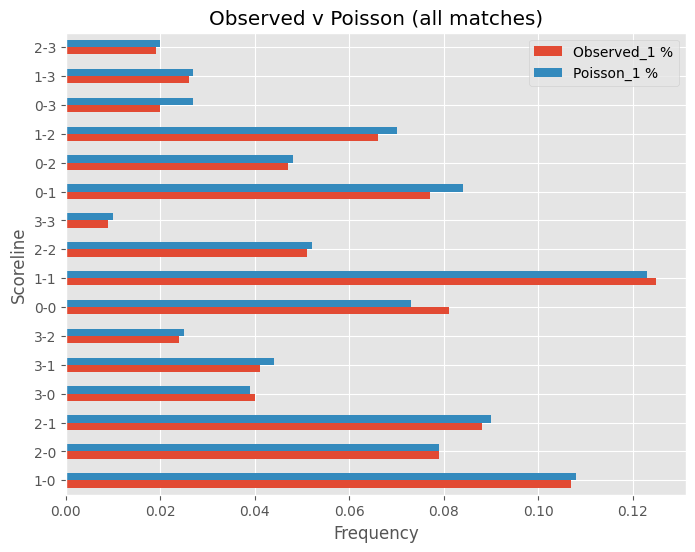

In [14]:
dfcomp.plot(x="Score", y=["Observed_1 %", "Poisson_1 %"], kind="barh", figsize=(8, 6))
plt.title('Observed v Poisson (all matches)')
plt.ylabel('Scoreline')
plt.xlabel('Frequency')
plt.show()

#### Observations
- Strong Poisson understate:  0-0
- Strong Poisson overstate:  0-3, 0-1  
- Weak Poisson overstate:  1-2

#### _____________________________________________________________________________________________________________________________________________________________________________

### Analysis of matches with home fav 1.66 or shorter


In [15]:
df_hfav = df[df['HW_%'] >= 0.60]
df_hfav

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,HST,AST,HF,AF,...,TR,HW_%,X_%,AW_%,Ov2.5_%,Un2.5_%,Exp,HG_Exp,AG_Exp,Sup Exp
0,I1,21/08/2021,Inter,Genoa,4.0,0.0,8.0,5.0,18.0,7.0,...,0.0,0.71,0.19,0.11,0.58,0.42,3.03,2.44,0.62,1.82
6,I1,22/08/2021,Napoli,Venezia,2.0,0.0,4.0,4.0,5.0,22.0,...,1.0,0.77,0.15,0.08,0.66,0.34,3.38,2.86,0.52,2.34
12,I1,28/08/2021,Atalanta,Bologna,0.0,0.0,3.0,1.0,11.0,14.0,...,0.0,0.72,0.17,0.11,0.68,0.32,3.50,2.82,0.68,2.14
13,I1,28/08/2021,Lazio,Spezia,6.0,1.0,10.0,2.0,12.0,9.0,...,1.0,0.71,0.18,0.11,0.62,0.38,3.16,2.53,0.63,1.90
15,I1,28/08/2021,Juventus,Empoli,0.0,1.0,6.0,3.0,11.0,6.0,...,0.0,0.76,0.15,0.08,0.65,0.35,3.30,2.76,0.51,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121644,E4,28/01/2006,Wycombe,Stockport,1.0,1.0,6.0,5.0,4.0,8.0,...,0.0,0.63,0.24,0.13,0.56,0.44,2.94,2.20,0.74,1.46
121655,E4,04/02/2006,Northampton,Rushden & D,2.0,0.0,9.0,2.0,13.0,16.0,...,0.0,0.60,0.25,0.15,0.52,0.48,2.76,2.00,0.76,1.24
121687,E4,18/02/2006,Carlisle,Rushden & D,5.0,0.0,7.0,0.0,7.0,10.0,...,0.0,0.60,0.25,0.15,0.54,0.46,2.84,2.06,0.78,1.28
121800,E4,17/04/2006,Carlisle,Notts County,2.0,1.0,8.0,3.0,10.0,6.0,...,0.0,0.62,0.24,0.14,0.53,0.47,2.79,2.06,0.73,1.33


In [16]:
print('DF Dimension >0.60 HW%: ',df_hfav.shape)

DF Dimension >0.60 HW%:  (15240, 31)


In [17]:
# Basic stats of dataset
round(df_hfav.describe(),2)

,FTHG,FTAG,HST,AST,HF,AF,HC,AC,HY,AY,...,TR,HW_%,X_%,AW_%,Ov2.5_%,Un2.5_%,Exp,HG_Exp,AG_Exp,Sup Exp
count,15240.00,15240.00,9932.00,9932.00,9794.00,9794.00,9953.00,9953.00,9987.00,9987.00,...,9987.00,15240.00,15240.00,15240.00,15240.00,15240.00,15240.00,15240.00,15240.00,15240.00
mean,2.22,0.75,6.85,3.11,12.11,13.28,6.97,3.57,1.40,2.09,...,0.18,0.69,0.20,0.11,0.56,0.44,2.95,2.32,0.62,1.70
std,1.45,0.87,3.06,1.99,4.40,4.77,3.23,2.26,1.19,1.40,...,0.44,0.07,0.04,0.03,0.07,0.07,0.31,0.36,0.13,0.44
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.60,0.07,0.03,0.34,0.26,2.07,1.54,0.24,0.98
25%,1.00,0.00,5.00,2.00,9.00,10.00,5.00,2.00,0.00,1.00,...,0.00,0.63,0.17,0.09,0.51,0.39,2.71,2.06,0.53,1.36
50%,2.00,1.00,6.00,3.00,12.00,13.00,7.00,3.00,1.00,2.00,...,0.00,0.67,0.21,0.12,0.56,0.44,2.94,2.27,0.63,1.60
75%,3.00,1.00,9.00,4.00,15.00,16.00,9.00,5.00,2.00,3.00,...,0.00,0.73,0.23,0.14,0.61,0.49,3.14,2.53,0.72,1.96
max,10.00,6.00,24.00,16.00,48.00,37.00,26.00,15.00,7.00,9.00,...,4.00,0.90,0.30,0.19,0.74,0.66,3.82,3.57,1.08,3.32


In [18]:
Mean_hfTG = df_hfav['TG'].mean()
STD_hfTG = df_hfav['TG'].std()
Med_hfTG = df_hfav['TG'].median()
Mean_hfHG = df_hfav['FTHG'].mean()
Mean_hfAG = df_hfav['FTAG'].mean()
print('Mean Total Goals (Home < 1.66):',round(Mean_hfTG,2))
print('SD Total Goals (Home < 1.66):',round(STD_hfTG,2))
print('Median Total Goals (Home < 1.66):',Med_hfTG)
print('Mean Home Goals (Home < 1.66):',round(Mean_hfHG,2))
print('Mean Away Goals (Home < 1.66):',round(Mean_hfAG,2))

Mean Total Goals (Home < 1.66): 2.97
SD Total Goals (Home < 1.66): 1.7
Median Total Goals (Home < 1.66): 3.0
Mean Home Goals (Home < 1.66): 2.22
Mean Away Goals (Home < 1.66): 0.75


In [19]:
df_hfav1_0 = df_hfav[((df_hfav['FTHG'] == 1) & (df_hfav['FTAG'] == 0))]
df_hfav2_0 = df_hfav[((df_hfav['FTHG'] == 2) & (df_hfav['FTAG'] == 0))]
df_hfav2_1 = df_hfav[((df_hfav['FTHG'] == 2) & (df_hfav['FTAG'] == 1))]
df_hfav3_0 = df_hfav[((df_hfav['FTHG'] == 3) & (df_hfav['FTAG'] == 0))]
df_hfav3_1 = df_hfav[((df_hfav['FTHG'] == 3) & (df_hfav['FTAG'] == 1))]
df_hfav3_2 = df_hfav[((df_hfav['FTHG'] == 3) & (df_hfav['FTAG'] == 2))]

df_hfav0_0 = df_hfav[((df_hfav['FTHG'] == 0) & (df_hfav['FTAG'] == 0))]
df_hfav1_1 = df_hfav[((df_hfav['FTHG'] == 1) & (df_hfav['FTAG'] == 1))]
df_hfav2_2 = df_hfav[((df_hfav['FTHG'] == 2) & (df_hfav['FTAG'] == 2))]
df_hfav3_3 = df_hfav[((df_hfav['FTHG'] == 3) & (df_hfav['FTAG'] == 3))]
df_hfav4_4 = df_hfav[((df_hfav['FTHG'] == 4) & (df_hfav['FTAG'] == 4))]

df_hfav0_1 = df_hfav[((df_hfav['FTHG'] == 0) & (df_hfav['FTAG'] == 1))]
df_hfav0_2 = df_hfav[((df_hfav['FTHG'] == 0) & (df_hfav['FTAG'] == 2))]
df_hfav1_2 = df_hfav[((df_hfav['FTHG'] == 1) & (df_hfav['FTAG'] == 2))]
df_hfav0_3 = df_hfav[((df_hfav['FTHG'] == 0) & (df_hfav['FTAG'] == 3))]
df_hfav1_3 = df_hfav[((df_hfav['FTHG'] == 1) & (df_hfav['FTAG'] == 3))]
df_hfav2_3 = df_hfav[((df_hfav['FTHG'] == 2) & (df_hfav['FTAG'] == 3))]

print('Total games finishing 1-0: ', len(df_hfav1_0), '',round((len(df_hfav1_0)/len(df_hfav)),3))
print('Total games finishing 2-0: ', len(df_hfav2_0), '',round((len(df_hfav2_0)/len(df_hfav)),3))
print('Total games finishing 2-1: ', len(df_hfav2_1), '',round((len(df_hfav2_1)/len(df_hfav)),3))
print('Total games finishing 3-0: ', len(df_hfav3_0), '',round((len(df_hfav3_0)/len(df_hfav)),3))
print('Total games finishing 3-1: ', len(df_hfav3_1), '',round((len(df_hfav3_1)/len(df_hfav)),3))
print('Total games finishing 3-2: ', len(df_hfav3_2), '',round((len(df_hfav3_2)/len(df_hfav)),3))
print('')
print('Total games finishing 0-0: ', len(df_hfav0_0), '',round((len(df_hfav0_0)/len(df_hfav)),3))
print('Total games finishing 1-1: ', len(df_hfav1_1), '',round((len(df_hfav1_1)/len(df_hfav)),3))
print('Total games finishing 2-2: ', len(df_hfav2_2), '',round((len(df_hfav2_2)/len(df_hfav)),3))
print('Total games finishing 3-3: ', len(df_hfav3_3), '',round((len(df_hfav3_3)/len(df_hfav)),3))
print('Total games finishing 4-4: ', len(df_hfav4_4), ' ',round((len(df_hfav4_4)/len(df_hfav)),3))
print('')
print('Total games finishing 0-1: ', len(df_hfav0_1), '',round((len(df_hfav0_1)/len(df_hfav)),3))
print('Total games finishing 0-2: ', len(df_hfav0_2), '',round((len(df_hfav0_2)/len(df_hfav)),3))
print('Total games finishing 1-2: ', len(df_hfav1_2), '',round((len(df_hfav1_2)/len(df_hfav)),3))
print('Total games finishing 0-3: ', len(df_hfav0_3), '',round((len(df_hfav0_3)/len(df_hfav)),3))
print('Total games finishing 1-3: ', len(df_hfav1_3), '',round((len(df_hfav1_3)/len(df_hfav)),3))
print('Total games finishing 2-3: ', len(df_hfav2_3), '',round((len(df_hfav2_3)/len(df_hfav)),3))

Total games finishing 1-0:  1865  0.122
Total games finishing 2-0:  1994  0.131
Total games finishing 2-1:  1620  0.106
Total games finishing 3-0:  1393  0.091
Total games finishing 3-1:  1065  0.07
Total games finishing 3-2:  440  0.029

Total games finishing 0-0:  737  0.048
Total games finishing 1-1:  1240  0.081
Total games finishing 2-2:  588  0.039
Total games finishing 3-3:  109  0.007
Total games finishing 4-4:  14   0.001

Total games finishing 0-1:  476  0.031
Total games finishing 0-2:  197  0.013
Total games finishing 1-2:  430  0.028
Total games finishing 0-3:  53  0.003
Total games finishing 1-3:  113  0.007
Total games finishing 2-3:  136  0.009


#### % of set scorelines (Favs) expected by poisson

In [20]:
avg_hg = df_hfav['FTHG'].mean()
avg_ag = df_hfav['FTAG'].mean()
avg_tg = df_hfav['TG'].mean()

score_1_0 = poisson.pmf(1, avg_hg) * poisson.pmf(0, avg_ag)
score_2_0 = poisson.pmf(2, avg_hg) * poisson.pmf(0, avg_ag)
score_2_1 = poisson.pmf(2, avg_hg) * poisson.pmf(1, avg_ag)
score_3_0 = poisson.pmf(3, avg_hg) * poisson.pmf(0, avg_ag)
score_3_1 = poisson.pmf(3, avg_hg) * poisson.pmf(1, avg_ag)
score_3_2 = poisson.pmf(3, avg_hg) * poisson.pmf(2, avg_ag)

score_0_0 = poisson.pmf(0, avg_hg) * poisson.pmf(0, avg_ag)
score_1_1 = poisson.pmf(1, avg_hg) * poisson.pmf(1, avg_ag)
score_2_2 = poisson.pmf(2, avg_hg) * poisson.pmf(2, avg_ag)
score_3_3 = poisson.pmf(3, avg_hg) * poisson.pmf(3, avg_ag)
score_4_4 = poisson.pmf(4, avg_hg) * poisson.pmf(4, avg_ag)


score_0_1 = poisson.pmf(0, avg_hg) * poisson.pmf(1, avg_ag)
score_0_2 = poisson.pmf(0, avg_hg) * poisson.pmf(2, avg_ag)
score_1_2 = poisson.pmf(1, avg_hg) * poisson.pmf(2, avg_ag)
score_0_3 = poisson.pmf(1, avg_hg) * poisson.pmf(3, avg_ag)
score_1_3 = poisson.pmf(1, avg_hg) * poisson.pmf(3, avg_ag)
score_2_3 = poisson.pmf(2, avg_hg) * poisson.pmf(3, avg_ag)

print('Poisson expected % of 1-0 from TOTAL matches: ',round(score_1_0,3))
print('Poisson expected % of 2-0 from TOTAL matches: ',round(score_2_0,3))
print('Poisson expected % of 2-1 from TOTAL matches: ',round(score_2_1,3))
print('Poisson expected % of 3-0 from TOTAL matches: ',round(score_3_0,3))
print('Poisson expected % of 3-1 from TOTAL matches: ',round(score_3_1,3))
print('Poisson expected % of 3-2 from TOTAL matches: ',round(score_3_2,3))
print('')
print('Poisson expected % of 0-0 from TOTAL matches: ',round(score_0_0,3))
print('Poisson expected % of 1-1 from TOTAL matches: ',round(score_1_1,3))
print('Poisson expected % of 2-2 from TOTAL matches: ',round(score_2_2,3))
print('Poisson expected % of 3-3 from TOTAL matches: ',round(score_3_3,3))
print('Poisson expected % of 4-4 from TOTAL matches: ',round(score_4_4,3))
print('')
print('Poisson expected % of 0-1 from TOTAL matches: ',round(score_0_1,3))
print('Poisson expected % of 0-2 from TOTAL matches: ',round(score_0_2,3))
print('Poisson expected % of 1-2 from TOTAL matches: ',round(score_1_2,3))
print('Poisson expected % of 0-3 from TOTAL matches: ',round(score_0_3,3))
print('Poisson expected % of 1-3 from TOTAL matches: ',round(score_1_3,3))
print('Poisson expected % of 2-3 from TOTAL matches: ',round(score_2_3,3))


Poisson expected % of 1-0 from TOTAL matches:  0.114
Poisson expected % of 2-0 from TOTAL matches:  0.127
Poisson expected % of 2-1 from TOTAL matches:  0.095
Poisson expected % of 3-0 from TOTAL matches:  0.094
Poisson expected % of 3-1 from TOTAL matches:  0.07
Poisson expected % of 3-2 from TOTAL matches:  0.026

Poisson expected % of 0-0 from TOTAL matches:  0.051
Poisson expected % of 1-1 from TOTAL matches:  0.085
Poisson expected % of 2-2 from TOTAL matches:  0.035
Poisson expected % of 3-3 from TOTAL matches:  0.007
Poisson expected % of 4-4 from TOTAL matches:  0.001

Poisson expected % of 0-1 from TOTAL matches:  0.038
Poisson expected % of 0-2 from TOTAL matches:  0.014
Poisson expected % of 1-2 from TOTAL matches:  0.032
Poisson expected % of 0-3 from TOTAL matches:  0.008
Poisson expected % of 1-3 from TOTAL matches:  0.008
Poisson expected % of 2-3 from TOTAL matches:  0.009


#### Create a Dataframe with Observed v Poisson expected %'s (Home Favs)

In [21]:
data =[['1-0',round((len(df_hfav1_0)/len(df_hfav)),3),round(score_1_0,3)],
       ['2-0',round((len(df_hfav2_0)/len(df_hfav)),3),round(score_2_0,3)],
       ['2-1',round((len(df_hfav2_1)/len(df_hfav)),3),round(score_2_1,3)],
       ['3-0',round((len(df_hfav3_0)/len(df_hfav)),3),round(score_3_0,3)],
       ['3-1',round((len(df_hfav3_1)/len(df_hfav)),3),round(score_3_1,3)],
       ['3-2',round((len(df_hfav3_2)/len(df_hfav)),3),round(score_3_2,3)],
       ['0-0',round((len(df_hfav0_0)/len(df_hfav)),3),round(score_0_0,3)],
       ['1-1',round((len(df_hfav1_1)/len(df_hfav)),3),round(score_1_1,3)],
       ['2-2',round((len(df_hfav2_2)/len(df_hfav)),3),round(score_2_2,3)],
       ['3-3',round((len(df_hfav3_3)/len(df_hfav)),3),round(score_3_3,3)],
      
       ['0-1',round((len(df_hfav0_1)/len(df_hfav)),3),round(score_0_1,3)],
       ['0-2',round((len(df_hfav0_2)/len(df_hfav)),3),round(score_0_2,3)],
       ['1-2',round((len(df_hfav1_2)/len(df_hfav)),3),round(score_1_2,3)],
       ['0-3',round((len(df_hfav0_3)/len(df_hfav)),3),round(score_0_3,3)],
       ['1-3',round((len(df_hfav1_3)/len(df_hfav)),3),round(score_1_3,3)],
       ['2-3',round((len(df_hfav2_3)/len(df_hfav)),3),round(score_2_3,3)]
      ]

dfcomp_hfav = pd.DataFrame(data, columns=['Score', 'Observed_2 %', 'Poisson_2 %'])
dfcomp_hfav['diff_2']=dfcomp_hfav['Observed_2 %']-dfcomp_hfav['Poisson_2 %']
dfcomp_hfav


,Score,Observed_2 %,Poisson_2 %,diff_2
0,1-0,0.122,0.114,0.008
1,2-0,0.131,0.127,0.004
2,2-1,0.106,0.095,0.011
3,3-0,0.091,0.094,-0.003
4,3-1,0.070,0.070,0.000
5,3-2,0.029,0.026,0.003
6,0-0,0.048,0.051,-0.003
7,1-1,0.081,0.085,-0.004
8,2-2,0.039,0.035,0.004
9,3-3,0.007,0.007,0.000


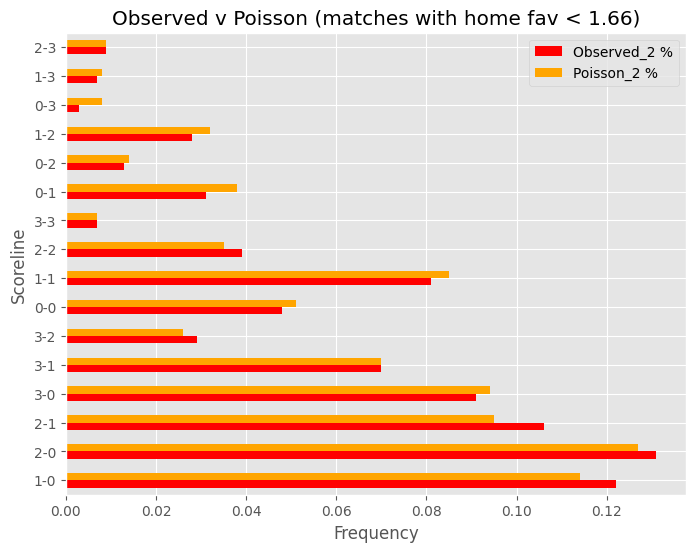

In [22]:
dfcomp_hfav.plot(x="Score", y=["Observed_2 %", "Poisson_2 %"], kind="barh", figsize=(8, 6), color=['Red', 'orange'])
plt.title('Observed v Poisson (matches with home fav < 1.66)')
plt.ylabel('Scoreline')
plt.xlabel('Frequency')
plt.show()

#### Observations
- Strong Poisson understate:  1-0,  2-1
- Weak Poisson understate:  2-2,  2-0
- Strong Poisson overstate: 1-2, 0-1  
- Weak Poisson overstate:  1-1

### _______________________________________________________________________________________________________________________________________________

### Analysis of matches with away fav 1.66 or shorter

In [23]:
df_afav = df[df['AW_%'] >= 0.60]
df_afav

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,HST,AST,HF,AF,...,TR,HW_%,X_%,AW_%,Ov2.5_%,Un2.5_%,Exp,HG_Exp,AG_Exp,Sup Exp
3,I1,21/08/2021,Torino,Atalanta,1.0,2.0,8.0,2.0,17.0,13.0,...,0.0,0.18,0.23,0.60,0.61,0.39,3.14,0.93,2.25,-1.32
5,I1,22/08/2021,Udinese,Juventus,2.0,2.0,6.0,4.0,11.0,12.0,...,0.0,0.13,0.22,0.65,0.54,0.46,2.84,0.68,2.16,-1.48
11,I1,27/08/2021,Verona,Inter,1.0,3.0,1.0,8.0,13.0,12.0,...,0.0,0.17,0.23,0.60,0.56,0.44,2.94,0.84,2.10,-1.26
16,I1,29/08/2021,Genoa,Napoli,1.0,2.0,3.0,8.0,17.0,15.0,...,0.0,0.16,0.22,0.62,0.58,0.42,3.03,0.82,2.21,-1.39
19,I1,29/08/2021,Salernitana,Roma,0.0,4.0,0.0,10.0,12.0,11.0,...,0.0,0.17,0.23,0.60,0.60,0.40,3.10,0.88,2.22,-1.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116291,E4,19/04/2016,York,Portsmouth,3.0,1.0,9.0,2.0,14.0,9.0,...,0.0,0.15,0.23,0.62,0.51,0.49,2.71,0.72,1.99,-1.27
116316,E4,30/04/2016,York,Bristol Rvs,1.0,4.0,1.0,8.0,11.0,8.0,...,0.0,0.15,0.21,0.63,0.56,0.44,2.94,0.75,2.16,-1.41
116880,E4,02/05/2015,Tranmere,Bury,0.0,1.0,2.0,5.0,11.0,14.0,...,0.0,0.15,0.24,0.61,0.45,0.55,2.47,0.67,1.80,-1.13
119616,E4,27/04/2010,Darlington,Notts County,0.0,5.0,1.0,7.0,9.0,11.0,...,0.0,0.13,0.21,0.66,0.54,0.46,2.84,0.67,2.17,-1.50


In [24]:
print('DF Dimension >0.60 AW%: ',df_afav.shape)

DF Dimension >0.60 AW%:  (3765, 31)


In [25]:
# Basic stats of dataset
round(df_afav.describe(),2)

,FTHG,FTAG,HST,AST,HF,AF,HC,AC,HY,AY,...,TR,HW_%,X_%,AW_%,Ov2.5_%,Un2.5_%,Exp,HG_Exp,AG_Exp,Sup Exp
count,3765.00,3765.00,2745.00,2745.00,2734.00,2734.00,2751.00,2751.00,2752.00,2752.00,...,2752.00,3765.00,3765.00,3765.00,3765.00,3765.00,3765.00,3765.00,3765.00,3765.00
mean,0.81,2.18,3.29,6.35,13.16,11.78,3.70,6.17,2.04,1.69,...,0.19,0.12,0.20,0.67,0.57,0.43,2.98,0.67,2.31,-1.64
std,0.91,1.46,2.06,2.85,4.73,4.27,2.21,3.04,1.41,1.28,...,0.44,0.03,0.03,0.06,0.07,0.07,0.30,0.12,0.32,0.38
min,0.00,0.00,0.00,0.00,2.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.03,0.06,0.60,0.36,0.26,2.12,0.22,1.57,-3.16
25%,0.00,1.00,2.00,4.00,10.00,9.00,2.00,4.00,1.00,1.00,...,0.00,0.10,0.18,0.62,0.52,0.38,2.76,0.58,2.08,-1.86
50%,1.00,2.00,3.00,6.00,13.00,11.00,3.00,6.00,2.00,2.00,...,0.00,0.13,0.21,0.66,0.57,0.43,2.99,0.67,2.26,-1.56
75%,1.00,3.00,5.00,8.00,16.00,14.00,5.00,8.00,3.00,2.00,...,0.00,0.15,0.23,0.71,0.62,0.48,3.16,0.75,2.49,-1.36
max,7.00,13.00,13.00,23.00,32.00,32.00,16.00,21.00,8.00,7.00,...,3.00,0.20,0.27,0.90,0.74,0.64,3.82,1.13,3.40,-1.00


In [26]:
Mean_afTG = df_afav['TG'].mean()
STD_afTG = df_afav['TG'].std()
Med_afTG = df_afav['TG'].median()
Mean_afHG = df_afav['FTHG'].mean()
Mean_afAG = df_afav['FTAG'].mean()
print('Mean Total Goals (Away < 1.66):',round(Mean_afTG,2))
print('SD Total Goals (Away < 1.66):',round(STD_afTG,2))
print('Median Total Goals (Away < 1.66):',Med_afTG)
print('Mean Home Goals (Away < 1.66):',round(Mean_afHG,2))
print('Mean Away Goals (Away < 1.66):',round(Mean_afAG,2))

Mean Total Goals (Away < 1.66): 2.99
SD Total Goals (Away < 1.66): 1.72
Median Total Goals (Away < 1.66): 3.0
Mean Home Goals (Away < 1.66): 0.81
Mean Away Goals (Away < 1.66): 2.18


In [27]:
df_afav1_0 = df_afav[((df_afav['FTHG'] == 1) & (df_afav['FTAG'] == 0))]
df_afav2_0 = df_afav[((df_afav['FTHG'] == 2) & (df_afav['FTAG'] == 0))]
df_afav2_1 = df_afav[((df_afav['FTHG'] == 2) & (df_afav['FTAG'] == 1))]
df_afav3_0 = df_afav[((df_afav['FTHG'] == 3) & (df_afav['FTAG'] == 0))]
df_afav3_1 = df_afav[((df_afav['FTHG'] == 3) & (df_afav['FTAG'] == 1))]
df_afav3_2 = df_afav[((df_afav['FTHG'] == 3) & (df_afav['FTAG'] == 2))]

df_afav0_0 = df_afav[((df_afav['FTHG'] == 0) & (df_afav['FTAG'] == 0))]
df_afav1_1 = df_afav[((df_afav['FTHG'] == 1) & (df_afav['FTAG'] == 1))]
df_afav2_2 = df_afav[((df_afav['FTHG'] == 2) & (df_afav['FTAG'] == 2))]
df_afav3_3 = df_afav[((df_afav['FTHG'] == 3) & (df_afav['FTAG'] == 3))]
df_afav4_4 = df_afav[((df_afav['FTHG'] == 4) & (df_afav['FTAG'] == 4))]

df_afav0_1 = df_afav[((df_afav['FTHG'] == 0) & (df_afav['FTAG'] == 1))]
df_afav0_2 = df_afav[((df_afav['FTHG'] == 0) & (df_afav['FTAG'] == 2))]
df_afav1_2 = df_afav[((df_afav['FTHG'] == 1) & (df_afav['FTAG'] == 2))]
df_afav0_3 = df_afav[((df_afav['FTHG'] == 0) & (df_afav['FTAG'] == 3))]
df_afav1_3 = df_afav[((df_afav['FTHG'] == 1) & (df_afav['FTAG'] == 3))]
df_afav2_3 = df_afav[((df_afav['FTHG'] == 2) & (df_afav['FTAG'] == 3))]

print('Total games finishing 1-0: ', len(df_afav1_0), '',round((len(df_afav1_0)/len(df_afav)),3))
print('Total games finishing 2-0: ', len(df_afav2_0), '',round((len(df_afav2_0)/len(df_afav)),3))
print('Total games finishing 2-1: ', len(df_afav2_1), '',round((len(df_afav2_1)/len(df_afav)),3))
print('Total games finishing 3-0: ', len(df_afav3_0), '',round((len(df_afav3_0)/len(df_afav)),3))
print('Total games finishing 3-1: ', len(df_afav3_1), '',round((len(df_afav3_1)/len(df_afav)),3))
print('Total games finishing 3-2: ', len(df_afav3_2), '',round((len(df_afav3_2)/len(df_afav)),3))
print('')
print('Total games finishing 0-0: ', len(df_afav0_0), '',round((len(df_afav0_0)/len(df_afav)),3))
print('Total games finishing 1-1: ', len(df_afav1_1), '',round((len(df_afav1_1)/len(df_afav)),3))
print('Total games finishing 2-2: ', len(df_afav2_2), '',round((len(df_afav2_2)/len(df_afav)),3))
print('Total games finishing 3-3: ', len(df_afav3_3), '',round((len(df_afav3_3)/len(df_afav)),3))
print('Total games finishing 4-4: ', len(df_afav4_4), ' ',round((len(df_afav4_4)/len(df_afav)),3))
print('')
print('Total games finishing 0-1: ', len(df_afav0_1), '',round((len(df_afav0_1)/len(df_afav)),3))
print('Total games finishing 0-2: ', len(df_afav0_2), '',round((len(df_afav0_2)/len(df_afav)),3))
print('Total games finishing 1-2: ', len(df_afav1_2), '',round((len(df_afav1_2)/len(df_afav)),3))
print('Total games finishing 0-3: ', len(df_afav0_3), '',round((len(df_afav0_3)/len(df_afav)),3))
print('Total games finishing 1-3: ', len(df_afav1_3), '',round((len(df_afav1_3)/len(df_afav)),3))
print('Total games finishing 2-3: ', len(df_afav2_3), '',round((len(df_afav2_3)/len(df_afav)),3))

Total games finishing 1-0:  124  0.033
Total games finishing 2-0:  53  0.014
Total games finishing 2-1:  125  0.033
Total games finishing 3-0:  20  0.005
Total games finishing 3-1:  27  0.007
Total games finishing 3-2:  45  0.012

Total games finishing 0-0:  176  0.047
Total games finishing 1-1:  305  0.081
Total games finishing 2-2:  160  0.042
Total games finishing 3-3:  26  0.007
Total games finishing 4-4:  4   0.001

Total games finishing 0-1:  476  0.126
Total games finishing 0-2:  444  0.118
Total games finishing 1-2:  428  0.114
Total games finishing 0-3:  283  0.075
Total games finishing 1-3:  262  0.07
Total games finishing 2-3:  116  0.031


In [28]:
avg_hg = df_afav['FTHG'].mean()
avg_ag = df_afav['FTAG'].mean()
avg_tg = df_afav['TG'].mean()

score_1_0 = poisson.pmf(1, avg_hg) * poisson.pmf(0, avg_ag)
score_2_0 = poisson.pmf(2, avg_hg) * poisson.pmf(0, avg_ag)
score_2_1 = poisson.pmf(2, avg_hg) * poisson.pmf(1, avg_ag)
score_3_0 = poisson.pmf(3, avg_hg) * poisson.pmf(0, avg_ag)
score_3_1 = poisson.pmf(3, avg_hg) * poisson.pmf(1, avg_ag)
score_3_2 = poisson.pmf(3, avg_hg) * poisson.pmf(2, avg_ag)

score_0_0 = poisson.pmf(0, avg_hg) * poisson.pmf(0, avg_ag)
score_1_1 = poisson.pmf(1, avg_hg) * poisson.pmf(1, avg_ag)
score_2_2 = poisson.pmf(2, avg_hg) * poisson.pmf(2, avg_ag)
score_3_3 = poisson.pmf(3, avg_hg) * poisson.pmf(3, avg_ag)
score_4_4 = poisson.pmf(4, avg_hg) * poisson.pmf(4, avg_ag)


score_0_1 = poisson.pmf(0, avg_hg) * poisson.pmf(1, avg_ag)
score_0_2 = poisson.pmf(0, avg_hg) * poisson.pmf(2, avg_ag)
score_1_2 = poisson.pmf(1, avg_hg) * poisson.pmf(2, avg_ag)
score_0_3 = poisson.pmf(1, avg_hg) * poisson.pmf(3, avg_ag)
score_1_3 = poisson.pmf(1, avg_hg) * poisson.pmf(3, avg_ag)
score_2_3 = poisson.pmf(2, avg_hg) * poisson.pmf(3, avg_ag)

print('Poisson expected % of 1-0 from TOTAL matches: ',round(score_1_0,3))
print('Poisson expected % of 2-0 from TOTAL matches: ',round(score_2_0,3))
print('Poisson expected % of 2-1 from TOTAL matches: ',round(score_2_1,3))
print('Poisson expected % of 3-0 from TOTAL matches: ',round(score_3_0,3))
print('Poisson expected % of 3-1 from TOTAL matches: ',round(score_3_1,3))
print('Poisson expected % of 3-2 from TOTAL matches: ',round(score_3_2,3))
print('')
print('Poisson expected % of 0-0 from TOTAL matches: ',round(score_0_0,3))
print('Poisson expected % of 1-1 from TOTAL matches: ',round(score_1_1,3))
print('Poisson expected % of 2-2 from TOTAL matches: ',round(score_2_2,3))
print('Poisson expected % of 3-3 from TOTAL matches: ',round(score_3_3,3))
print('Poisson expected % of 4-4 from TOTAL matches: ',round(score_4_4,3))
print('')
print('Poisson expected % of 0-1 from TOTAL matches: ',round(score_0_1,3))
print('Poisson expected % of 0-2 from TOTAL matches: ',round(score_0_2,3))
print('Poisson expected % of 1-2 from TOTAL matches: ',round(score_1_2,3))
print('Poisson expected % of 0-3 from TOTAL matches: ',round(score_0_3,3))
print('Poisson expected % of 1-3 from TOTAL matches: ',round(score_1_3,3))
print('Poisson expected % of 2-3 from TOTAL matches: ',round(score_2_3,3))

Poisson expected % of 1-0 from TOTAL matches:  0.041
Poisson expected % of 2-0 from TOTAL matches:  0.016
Poisson expected % of 2-1 from TOTAL matches:  0.036
Poisson expected % of 3-0 from TOTAL matches:  0.004
Poisson expected % of 3-1 from TOTAL matches:  0.01
Poisson expected % of 3-2 from TOTAL matches:  0.011

Poisson expected % of 0-0 from TOTAL matches:  0.05
Poisson expected % of 1-1 from TOTAL matches:  0.089
Poisson expected % of 2-2 from TOTAL matches:  0.039
Poisson expected % of 3-3 from TOTAL matches:  0.008
Poisson expected % of 4-4 from TOTAL matches:  0.001

Poisson expected % of 0-1 from TOTAL matches:  0.11
Poisson expected % of 0-2 from TOTAL matches:  0.12
Poisson expected % of 1-2 from TOTAL matches:  0.097
Poisson expected % of 0-3 from TOTAL matches:  0.07
Poisson expected % of 1-3 from TOTAL matches:  0.07
Poisson expected % of 2-3 from TOTAL matches:  0.028


In [29]:
data =[['1-0',round((len(df_afav1_0)/len(df_afav)),3),round(score_1_0,3)],
       ['2-0',round((len(df_afav2_0)/len(df_afav)),3),round(score_2_0,3)],
       ['2-1',round((len(df_afav2_1)/len(df_afav)),3),round(score_2_1,3)],
       ['3-0',round((len(df_afav3_0)/len(df_afav)),3),round(score_3_0,3)],
       ['3-1',round((len(df_afav3_1)/len(df_afav)),3),round(score_3_1,3)],
       ['3-2',round((len(df_afav3_2)/len(df_afav)),3),round(score_3_2,3)],
       ['0-0',round((len(df_afav0_0)/len(df_afav)),3),round(score_0_0,3)],
       ['1-1',round((len(df_afav1_1)/len(df_afav)),3),round(score_1_1,3)],
       ['2-2',round((len(df_afav2_2)/len(df_afav)),3),round(score_2_2,3)],
       ['3-3',round((len(df_afav3_3)/len(df_afav)),3),round(score_3_3,3)],
      
       ['0-1',round((len(df_afav0_1)/len(df_afav)),3),round(score_0_1,3)],
       ['0-2',round((len(df_afav0_2)/len(df_afav)),3),round(score_0_2,3)],
       ['1-2',round((len(df_afav1_2)/len(df_afav)),3),round(score_1_2,3)],
       ['0-3',round((len(df_afav0_3)/len(df_afav)),3),round(score_0_3,3)],
       ['1-3',round((len(df_afav1_3)/len(df_afav)),3),round(score_1_3,3)],
       ['2-3',round((len(df_afav2_3)/len(df_afav)),3),round(score_2_3,3)]
      ]

dfcomp_afav = pd.DataFrame(data, columns=['Score', 'Observed_3 %', 'Poisson_3 %'])
dfcomp_afav['diff_3']=dfcomp_afav['Observed_3 %']-dfcomp_afav['Poisson_3 %']
dfcomp_afav

,Score,Observed_3 %,Poisson_3 %,diff_3
0,1-0,0.033,0.041,-0.008
1,2-0,0.014,0.016,-0.002
2,2-1,0.033,0.036,-0.003
3,3-0,0.005,0.004,0.001
4,3-1,0.007,0.010,-0.003
5,3-2,0.012,0.011,0.001
6,0-0,0.047,0.050,-0.003
7,1-1,0.081,0.089,-0.008
8,2-2,0.042,0.039,0.003
9,3-3,0.007,0.008,-0.001


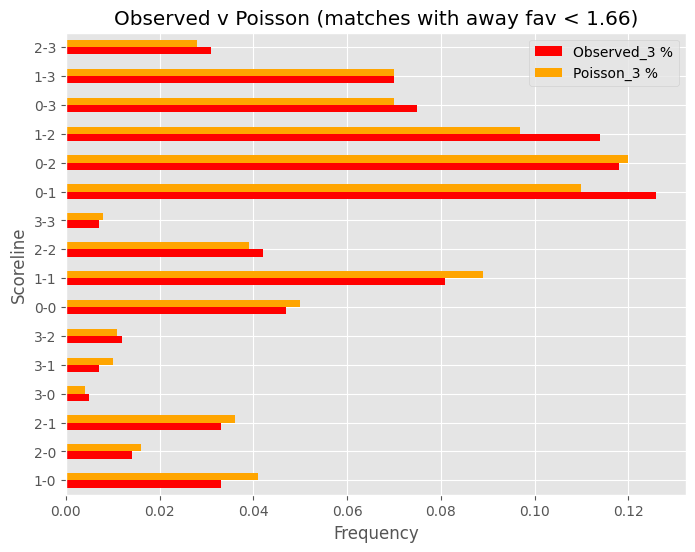

In [30]:
dfcomp_afav.plot(x="Score", y=["Observed_3 %", "Poisson_3 %"], kind="barh", figsize=(8, 6), color=['Red', 'Orange'])
plt.title('Observed v Poisson (matches with away fav < 1.66)')
plt.ylabel('Scoreline')
plt.xlabel('Frequency')
plt.show()

#### Observations
- Strong Poisson understate:  1-2,  0-1
- Weak Poisson understate:  0-3,  2-2
- Strong Poisson overstate: 1-1,  1-0 
- Weak Poisson overstate:  0-0,  2-1

### ____________________________________________________________________________________________________________________________________________

### Analysis of matches with home fav < 1.33 


In [31]:
df_hbfav = df[df['HW_%'] >= 0.75]
df_hbfav

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,HST,AST,HF,AF,...,TR,HW_%,X_%,AW_%,Ov2.5_%,Un2.5_%,Exp,HG_Exp,AG_Exp,Sup Exp
6,I1,22/08/2021,Napoli,Venezia,2.0,0.0,4.0,4.0,5.0,22.0,...,1.0,0.77,0.15,0.08,0.66,0.34,3.38,2.86,0.52,2.34
15,I1,28/08/2021,Juventus,Empoli,0.0,1.0,6.0,3.0,11.0,6.0,...,0.0,0.76,0.15,0.08,0.65,0.35,3.30,2.76,0.51,2.25
46,I1,22/09/2021,Milan,Venezia,2.0,0.0,4.0,2.0,12.0,13.0,...,0.0,0.77,0.15,0.08,0.65,0.35,3.30,2.79,0.51,2.28
58,I1,26/09/2021,Napoli,Cagliari,2.0,0.0,7.0,1.0,12.0,10.0,...,0.0,0.76,0.16,0.08,0.63,0.37,3.20,2.69,0.51,2.18
120,I1,20/11/2021,Atalanta,Spezia,5.0,2.0,9.0,5.0,10.0,11.0,...,0.0,0.76,0.15,0.09,0.69,0.31,3.57,2.98,0.59,2.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112579,G1,14/05/2006,Olympiakos,Ionikos,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,0.75,0.17,0.07,0.59,0.41,3.06,2.56,0.47,2.09
113046,E4,02/04/2022,Forest Green,Scunthorpe,1.0,0.0,6.0,5.0,14.0,14.0,...,0.0,0.76,0.16,0.08,0.54,0.46,2.84,2.39,0.45,1.94
113123,E4,07/05/2022,Bristol Rvs,Scunthorpe,7.0,0.0,14.0,1.0,10.0,17.0,...,0.0,0.83,0.12,0.05,0.63,0.37,3.20,2.85,0.35,2.50
115724,E4,14/04/2017,Luton,Leyton Orient,2.0,2.0,6.0,4.0,16.0,10.0,...,0.0,0.77,0.15,0.07,0.63,0.37,3.20,2.70,0.46,2.24


In [32]:
print('DF Dimension >0.75 HW%: ',df_hbfav.shape)

DF Dimension >0.75 HW%:  (3351, 31)


In [33]:
# basic stats of dataset
round(df_hbfav.describe(),2)

,FTHG,FTAG,HST,AST,HF,AF,HC,AC,HY,AY,...,TR,HW_%,X_%,AW_%,Ov2.5_%,Un2.5_%,Exp,HG_Exp,AG_Exp,Sup Exp
count,3351.00,3351.00,2271.00,2271.00,2257.00,2257.00,2278.00,2278.00,2278.00,2278.00,...,2278.00,3351.00,3351.00,3351.00,3351.00,3351.00,3351.00,3351.00,3351.00,3351.00
mean,2.68,0.60,7.80,2.68,11.28,12.49,7.62,3.03,1.20,2.01,...,0.16,0.79,0.14,0.07,0.63,0.37,3.24,2.79,0.44,2.35
std,1.54,0.77,3.17,1.85,4.25,4.65,3.39,2.06,1.12,1.41,...,0.41,0.03,0.02,0.01,0.06,0.06,0.29,0.29,0.07,0.31
min,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.75,0.07,0.03,0.40,0.26,2.29,1.98,0.24,1.64
25%,2.00,0.00,6.00,1.00,8.00,9.00,5.00,2.00,0.00,1.00,...,0.00,0.76,0.13,0.06,0.58,0.33,3.03,2.59,0.40,2.12
50%,2.00,0.00,7.00,2.00,11.00,12.00,7.00,3.00,1.00,2.00,...,0.00,0.79,0.15,0.07,0.63,0.37,3.20,2.75,0.44,2.30
75%,4.00,1.00,10.00,4.00,14.00,15.00,10.00,4.00,2.00,3.00,...,0.00,0.81,0.16,0.08,0.67,0.42,3.46,3.00,0.49,2.54
max,10.00,5.00,24.00,11.00,48.00,31.00,23.00,12.00,6.00,9.00,...,3.00,0.90,0.19,0.11,0.74,0.60,3.82,3.57,0.67,3.32


In [34]:
Mean_hbfTG = df_hbfav['TG'].mean()
STD_hbfTG = df_hbfav['TG'].std()
Med_hbfTG = df_hbfav['TG'].median()
Mean_hbfHG = df_hbfav['FTHG'].mean()
Mean_hbfAG = df_hbfav['FTAG'].mean()
print('Mean Total Goals (Home < 1.33):',round(Mean_hbfTG,2))
print('SD Total Goals (Home  < 1.33):',round(STD_hbfTG,2))
print('Median Total Goals (Home  < 1.33):',Med_hbfTG)
print('Mean Home Goals (Home  < 1.33):',round(Mean_hbfHG,2))
print('Mean Away Goals (Home  < 1.33):',round(Mean_hbfAG,2))

Mean Total Goals (Home < 1.33): 3.28
SD Total Goals (Home  < 1.33): 1.75
Median Total Goals (Home  < 1.33): 3.0
Mean Home Goals (Home  < 1.33): 2.68
Mean Away Goals (Home  < 1.33): 0.6


In [35]:
df_hbfav1_0 = df_hbfav[((df_hbfav['FTHG'] == 1) & (df_hbfav['FTAG'] == 0))]
df_hbfav2_0 = df_hbfav[((df_hbfav['FTHG'] == 2) & (df_hbfav['FTAG'] == 0))]
df_hbfav2_1 = df_hbfav[((df_hbfav['FTHG'] == 2) & (df_hbfav['FTAG'] == 1))]
df_hbfav3_0 = df_hbfav[((df_hbfav['FTHG'] == 3) & (df_hbfav['FTAG'] == 0))]
df_hbfav3_1 = df_hbfav[((df_hbfav['FTHG'] == 3) & (df_hbfav['FTAG'] == 1))]
df_hbfav3_2 = df_hbfav[((df_hbfav['FTHG'] == 3) & (df_hbfav['FTAG'] == 2))]

df_hbfav0_0 = df_hbfav[((df_hbfav['FTHG'] == 0) & (df_hbfav['FTAG'] == 0))]
df_hbfav1_1 = df_hbfav[((df_hbfav['FTHG'] == 1) & (df_hbfav['FTAG'] == 1))]
df_hbfav2_2 = df_hbfav[((df_hbfav['FTHG'] == 2) & (df_hbfav['FTAG'] == 2))]
df_hbfav3_3 = df_hbfav[((df_hbfav['FTHG'] == 3) & (df_hbfav['FTAG'] == 3))]
df_hbfav4_4 = df_hbfav[((df_hbfav['FTHG'] == 4) & (df_hbfav['FTAG'] == 4))]

df_hbfav0_1 = df_hbfav[((df_hbfav['FTHG'] == 0) & (df_hbfav['FTAG'] == 1))]
df_hbfav0_2 = df_hbfav[((df_hbfav['FTHG'] == 0) & (df_hbfav['FTAG'] == 2))]
df_hbfav1_2 = df_hbfav[((df_hbfav['FTHG'] == 1) & (df_hbfav['FTAG'] == 2))]
df_hbfav0_3 = df_hbfav[((df_hbfav['FTHG'] == 0) & (df_hbfav['FTAG'] == 3))]
df_hbfav1_3 = df_hbfav[((df_hbfav['FTHG'] == 1) & (df_hbfav['FTAG'] == 3))]
df_hbfav2_3 = df_hbfav[((df_hbfav['FTHG'] == 2) & (df_hbfav['FTAG'] == 3))]

print('Total games finishing 1-0: ', len(df_hbfav1_0), '',round((len(df_hbfav1_0)/len(df_hbfav)),3))
print('Total games finishing 2-0: ', len(df_hbfav2_0), '',round((len(df_hbfav2_0)/len(df_hbfav)),3))
print('Total games finishing 2-1: ', len(df_hbfav2_1), '',round((len(df_hbfav2_1)/len(df_hbfav)),3))
print('Total games finishing 3-0: ', len(df_hbfav3_0), '',round((len(df_hbfav3_0)/len(df_hbfav)),3))
print('Total games finishing 3-1: ', len(df_hbfav3_1), '',round((len(df_hbfav3_1)/len(df_hbfav)),3))
print('Total games finishing 3-2: ', len(df_hbfav3_2), '',round((len(df_hbfav3_2)/len(df_hbfav)),3))
print('')
print('Total games finishing 0-0: ', len(df_hbfav0_0), '',round((len(df_hbfav0_0)/len(df_hbfav)),3))
print('Total games finishing 1-1: ', len(df_hbfav1_1), '',round((len(df_hbfav1_1)/len(df_hbfav)),3))
print('Total games finishing 2-2: ', len(df_hbfav2_2), '',round((len(df_hbfav2_2)/len(df_hbfav)),3))
print('Total games finishing 3-3: ', len(df_hbfav3_3), '',round((len(df_hbfav3_3)/len(df_hbfav)),3))
print('Total games finishing 4-4: ', len(df_hbfav4_4), ' ',round((len(df_hbfav4_4)/len(df_hbfav)),3))
print('')
print('Total games finishing 0-1: ', len(df_hbfav0_1), '',round((len(df_hbfav0_1)/len(df_hbfav)),3))
print('Total games finishing 0-2: ', len(df_hbfav0_2), '',round((len(df_hbfav0_2)/len(df_hbfav)),3))
print('Total games finishing 1-2: ', len(df_hbfav1_2), '',round((len(df_hbfav1_2)/len(df_hbfav)),3))
print('Total games finishing 0-3: ', len(df_hbfav0_3), '',round((len(df_hbfav0_3)/len(df_hbfav)),3))
print('Total games finishing 1-3: ', len(df_hbfav1_3), '',round((len(df_hbfav1_3)/len(df_hbfav)),3))
print('Total games finishing 2-3: ', len(df_hbfav2_3), '',round((len(df_hbfav2_3)/len(df_hbfav)),3))

Total games finishing 1-0:  385  0.115
Total games finishing 2-0:  473  0.141
Total games finishing 2-1:  325  0.097
Total games finishing 3-0:  394  0.118
Total games finishing 3-1:  257  0.077
Total games finishing 3-2:  89  0.027

Total games finishing 0-0:  95  0.028
Total games finishing 1-1:  177  0.053
Total games finishing 2-2:  90  0.027
Total games finishing 3-3:  12  0.004
Total games finishing 4-4:  0   0.0

Total games finishing 0-1:  46  0.014
Total games finishing 0-2:  18  0.005
Total games finishing 1-2:  44  0.013
Total games finishing 0-3:  7  0.002
Total games finishing 1-3:  8  0.002
Total games finishing 2-3:  16  0.005


In [36]:
avg_hg = df_hbfav['FTHG'].mean()
avg_ag = df_hbfav['FTAG'].mean()
avg_tg = df_hbfav['TG'].mean()

score_1_0 = poisson.pmf(1, avg_hg) * poisson.pmf(0, avg_ag)
score_2_0 = poisson.pmf(2, avg_hg) * poisson.pmf(0, avg_ag)
score_2_1 = poisson.pmf(2, avg_hg) * poisson.pmf(1, avg_ag)
score_3_0 = poisson.pmf(3, avg_hg) * poisson.pmf(0, avg_ag)
score_3_1 = poisson.pmf(3, avg_hg) * poisson.pmf(1, avg_ag)
score_3_2 = poisson.pmf(3, avg_hg) * poisson.pmf(2, avg_ag)

score_0_0 = poisson.pmf(0, avg_hg) * poisson.pmf(0, avg_ag)
score_1_1 = poisson.pmf(1, avg_hg) * poisson.pmf(1, avg_ag)
score_2_2 = poisson.pmf(2, avg_hg) * poisson.pmf(2, avg_ag)
score_3_3 = poisson.pmf(3, avg_hg) * poisson.pmf(3, avg_ag)
score_4_4 = poisson.pmf(4, avg_hg) * poisson.pmf(4, avg_ag)


score_0_1 = poisson.pmf(0, avg_hg) * poisson.pmf(1, avg_ag)
score_0_2 = poisson.pmf(0, avg_hg) * poisson.pmf(2, avg_ag)
score_1_2 = poisson.pmf(1, avg_hg) * poisson.pmf(2, avg_ag)
score_0_3 = poisson.pmf(1, avg_hg) * poisson.pmf(3, avg_ag)
score_1_3 = poisson.pmf(1, avg_hg) * poisson.pmf(3, avg_ag)
score_2_3 = poisson.pmf(2, avg_hg) * poisson.pmf(3, avg_ag)

print('Poisson expected % of 1-0 from TOTAL matches: ',round(score_1_0,3))
print('Poisson expected % of 2-0 from TOTAL matches: ',round(score_2_0,3))
print('Poisson expected % of 2-1 from TOTAL matches: ',round(score_2_1,3))
print('Poisson expected % of 3-0 from TOTAL matches: ',round(score_3_0,3))
print('Poisson expected % of 3-1 from TOTAL matches: ',round(score_3_1,3))
print('Poisson expected % of 3-2 from TOTAL matches: ',round(score_3_2,3))
print('')
print('Poisson expected % of 0-0 from TOTAL matches: ',round(score_0_0,3))
print('Poisson expected % of 1-1 from TOTAL matches: ',round(score_1_1,3))
print('Poisson expected % of 2-2 from TOTAL matches: ',round(score_2_2,3))
print('Poisson expected % of 3-3 from TOTAL matches: ',round(score_3_3,3))
print('Poisson expected % of 4-4 from TOTAL matches: ',round(score_4_4,3))
print('')
print('Poisson expected % of 0-1 from TOTAL matches: ',round(score_0_1,3))
print('Poisson expected % of 0-2 from TOTAL matches: ',round(score_0_2,3))
print('Poisson expected % of 1-2 from TOTAL matches: ',round(score_1_2,3))
print('Poisson expected % of 0-3 from TOTAL matches: ',round(score_0_3,3))
print('Poisson expected % of 1-3 from TOTAL matches: ',round(score_1_3,3))
print('Poisson expected % of 2-3 from TOTAL matches: ',round(score_2_3,3))

Poisson expected % of 1-0 from TOTAL matches:  0.101
Poisson expected % of 2-0 from TOTAL matches:  0.135
Poisson expected % of 2-1 from TOTAL matches:  0.081
Poisson expected % of 3-0 from TOTAL matches:  0.12
Poisson expected % of 3-1 from TOTAL matches:  0.073
Poisson expected % of 3-2 from TOTAL matches:  0.022

Poisson expected % of 0-0 from TOTAL matches:  0.038
Poisson expected % of 1-1 from TOTAL matches:  0.061
Poisson expected % of 2-2 from TOTAL matches:  0.025
Poisson expected % of 3-3 from TOTAL matches:  0.004
Poisson expected % of 4-4 from TOTAL matches:  0.0

Poisson expected % of 0-1 from TOTAL matches:  0.023
Poisson expected % of 0-2 from TOTAL matches:  0.007
Poisson expected % of 1-2 from TOTAL matches:  0.018
Poisson expected % of 0-3 from TOTAL matches:  0.004
Poisson expected % of 1-3 from TOTAL matches:  0.004
Poisson expected % of 2-3 from TOTAL matches:  0.005


In [37]:
data =[['1-0',round((len(df_hbfav1_0)/len(df_hbfav)),3),round(score_1_0,3)],
       ['2-0',round((len(df_hbfav2_0)/len(df_hbfav)),3),round(score_2_0,3)],
       ['2-1',round((len(df_hbfav2_1)/len(df_hbfav)),3),round(score_2_1,3)],
       ['3-0',round((len(df_hbfav3_0)/len(df_hbfav)),3),round(score_3_0,3)],
       ['3-1',round((len(df_hbfav3_1)/len(df_hbfav)),3),round(score_3_1,3)],
       ['3-2',round((len(df_hbfav3_2)/len(df_hbfav)),3),round(score_3_2,3)],
       ['0-0',round((len(df_hbfav0_0)/len(df_hbfav)),3),round(score_0_0,3)],
       ['1-1',round((len(df_hbfav1_1)/len(df_hbfav)),3),round(score_1_1,3)],
       ['2-2',round((len(df_hbfav2_2)/len(df_hbfav)),3),round(score_2_2,3)],
       ['3-3',round((len(df_hbfav3_3)/len(df_hbfav)),3),round(score_3_3,3)],
      
       ['0-1',round((len(df_hbfav0_1)/len(df_hbfav)),3),round(score_0_1,3)],
       ['0-2',round((len(df_hbfav0_2)/len(df_hbfav)),3),round(score_0_2,3)],
       ['1-2',round((len(df_hbfav1_2)/len(df_hbfav)),3),round(score_1_2,3)],
       ['0-3',round((len(df_hbfav0_3)/len(df_hbfav)),3),round(score_0_3,3)],
       ['1-3',round((len(df_hbfav1_3)/len(df_hbfav)),3),round(score_1_3,3)],
       ['2-3',round((len(df_hbfav2_3)/len(df_hbfav)),3),round(score_2_3,3)]
      ]

dfcomp_hbfav = pd.DataFrame(data, columns=['Score', 'Observed_4 %', 'Poisson_4 %'])
dfcomp_hbfav['diff_4']=dfcomp_hbfav['Observed_4 %']-dfcomp_hbfav['Poisson_4 %']
dfcomp_hbfav

,Score,Observed_4 %,Poisson_4 %,diff_4
0,1-0,0.115,0.101,0.014
1,2-0,0.141,0.135,0.006
2,2-1,0.097,0.081,0.016
3,3-0,0.118,0.120,-0.002
4,3-1,0.077,0.073,0.004
5,3-2,0.027,0.022,0.005
6,0-0,0.028,0.038,-0.010
7,1-1,0.053,0.061,-0.008
8,2-2,0.027,0.025,0.002
9,3-3,0.004,0.004,0.000


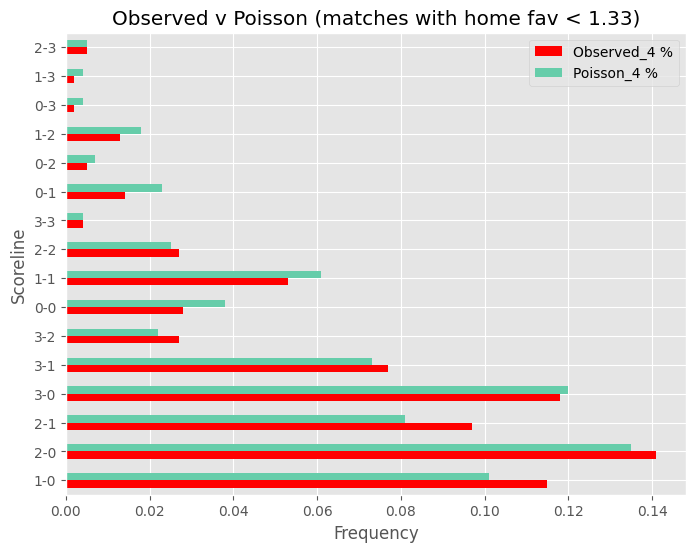

In [38]:
dfcomp_hbfav.plot(x="Score", y=["Observed_4 %", "Poisson_4 %"], kind="barh", figsize=(8, 6), color=['Red','mediumaquamarine'])
plt.title('Observed v Poisson (matches with home fav < 1.33)')
plt.ylabel('Scoreline')
plt.xlabel('Frequency')
plt.show()

#### Observations
- Strong Poisson understate:  2-1,  1-0
- Weak Poisson understate: 2-0,  3-2
- Strong Poisson overstate:  0-1,  1-1, 0-0
- Weak Poisson overstate:  1-2

#### ______________________________________________________________________________________________________________________________________________

### Analysis of matches with away fav < 1.43 
 slightly larger price threshold to gather workable sample size

In [39]:
df_abfav = df[df['AW_%'] >= 0.70]
df_abfav

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,HST,AST,HF,AF,...,TR,HW_%,X_%,AW_%,Ov2.5_%,Un2.5_%,Exp,HG_Exp,AG_Exp,Sup Exp
33,I1,18/09/2021,Salernitana,Atalanta,0.0,1.0,1.0,3.0,21.0,13.0,...,0.0,0.10,0.17,0.73,0.62,0.38,3.16,0.58,2.58,-2.00
44,I1,22/09/2021,Spezia,Juventus,2.0,3.0,5.0,9.0,14.0,10.0,...,0.0,0.11,0.18,0.70,0.62,0.38,3.16,0.63,2.50,-1.87
107,I1,31/10/2021,Salernitana,Napoli,0.0,1.0,3.0,3.0,11.0,13.0,...,2.0,0.10,0.17,0.73,0.61,0.39,3.14,0.58,2.56,-1.98
142,I1,30/11/2021,Salernitana,Juventus,0.0,2.0,0.0,7.0,14.0,9.0,...,0.0,0.10,0.18,0.72,0.55,0.45,2.89,0.55,2.34,-1.79
171,I1,17/12/2021,Salernitana,Inter,0.0,5.0,2.0,8.0,10.0,10.0,...,0.0,0.06,0.12,0.82,0.66,0.34,3.38,0.41,2.97,-2.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112335,G1,13/05/2007,Ionikos,Olympiakos,3.0,5.0,NaN,NaN,NaN,NaN,...,NaN,0.08,0.16,0.76,0.59,0.41,3.06,0.49,2.57,-2.08
112336,G1,13/05/2007,Kalamaria,Larisa,1.0,2.0,NaN,NaN,NaN,NaN,...,NaN,0.10,0.18,0.72,0.43,0.57,2.40,0.46,1.94,-1.48
112492,G1,13/02/2006,Akratitos,Olympiakos,0.0,1.0,NaN,NaN,NaN,NaN,...,NaN,0.07,0.15,0.78,0.55,0.45,2.89,0.42,2.47,-2.05
112504,G1,26/02/2006,Akratitos,Panathinaikos,0.0,2.0,NaN,NaN,NaN,NaN,...,NaN,0.08,0.16,0.76,0.46,0.54,2.53,0.40,2.13,-1.73


In [40]:
print('DF Dimension >0.70 AW%: ',df_abfav.shape)

DF Dimension >0.70 AW%:  (1186, 31)


In [41]:
# Basic stats of dataset
round(df_abfav.describe(),2)

,FTHG,FTAG,HST,AST,HF,AF,HC,AC,HY,AY,...,TR,HW_%,X_%,AW_%,Ov2.5_%,Un2.5_%,Exp,HG_Exp,AG_Exp,Sup Exp
count,1186.00,1186.00,892.00,892.00,891.00,891.00,892.00,892.00,892.00,892.00,...,892.00,1186.00,1186.00,1186.00,1186.00,1186.00,1186.00,1186.00,1186.00,1186.00
mean,0.71,2.43,2.97,6.79,13.01,10.93,3.40,6.65,2.10,1.56,...,0.16,0.09,0.17,0.74,0.61,0.39,3.17,0.54,2.63,-2.08
std,0.87,1.59,1.94,2.93,4.86,4.09,1.99,3.19,1.47,1.26,...,0.44,0.02,0.02,0.04,0.06,0.06,0.30,0.09,0.29,0.30
min,0.00,0.00,0.00,0.00,2.00,2.00,0.00,0.00,0.00,0.00,...,0.00,0.03,0.06,0.70,0.38,0.26,2.22,0.22,1.81,-3.16
25%,0.00,1.00,2.00,5.00,9.00,8.00,2.00,4.00,1.00,1.00,...,0.00,0.08,0.15,0.71,0.57,0.34,2.99,0.49,2.43,-2.28
50%,1.00,2.00,3.00,6.00,13.00,11.00,3.00,6.00,2.00,1.00,...,0.00,0.09,0.17,0.74,0.62,0.38,3.16,0.54,2.59,-2.03
75%,1.00,3.00,4.00,8.00,16.00,13.00,5.00,9.00,3.00,2.00,...,0.00,0.10,0.18,0.77,0.66,0.43,3.38,0.60,2.82,-1.86
max,7.00,13.00,12.00,23.00,31.00,32.00,11.00,18.00,8.00,6.00,...,3.00,0.13,0.22,0.90,0.74,0.62,3.82,0.79,3.40,-1.40


In [42]:
Mean_abfTG = df_abfav['TG'].mean()
STD_abfTG = df_abfav['TG'].std()
Med_abfTG = df_abfav['TG'].median()
Mean_abfHG = df_abfav['FTHG'].mean()
Mean_abfAG = df_abfav['FTAG'].mean()
print('Mean Total Goals (Away < 1.33):',round(Mean_abfTG,2))
print('SD Total Goals (Away  < 1.33):',round(STD_abfTG,2))
print('Median Total Goals (Away  < 1.33):',Med_abfTG)
print('Mean Home Goals (Away  < 1.33):',round(Mean_abfHG,2))
print('Mean Away Goals (Away  < 1.33):',round(Mean_abfAG,2))

Mean Total Goals (Away < 1.33): 3.14
SD Total Goals (Away  < 1.33): 1.84
Median Total Goals (Away  < 1.33): 3.0
Mean Home Goals (Away  < 1.33): 0.71
Mean Away Goals (Away  < 1.33): 2.43


In [43]:
df_abfav1_0 = df_abfav[((df_abfav['FTHG'] == 1) & (df_abfav['FTAG'] == 0))]
df_abfav2_0 = df_abfav[((df_abfav['FTHG'] == 2) & (df_abfav['FTAG'] == 0))]
df_abfav2_1 = df_abfav[((df_abfav['FTHG'] == 2) & (df_abfav['FTAG'] == 1))]
df_abfav3_0 = df_abfav[((df_abfav['FTHG'] == 3) & (df_abfav['FTAG'] == 0))]
df_abfav3_1 = df_abfav[((df_abfav['FTHG'] == 3) & (df_abfav['FTAG'] == 1))]
df_abfav3_2 = df_abfav[((df_abfav['FTHG'] == 3) & (df_abfav['FTAG'] == 2))]

df_abfav0_0 = df_abfav[((df_abfav['FTHG'] == 0) & (df_abfav['FTAG'] == 0))]
df_abfav1_1 = df_abfav[((df_abfav['FTHG'] == 1) & (df_abfav['FTAG'] == 1))]
df_abfav2_2 = df_abfav[((df_abfav['FTHG'] == 2) & (df_abfav['FTAG'] == 2))]
df_abfav3_3 = df_abfav[((df_abfav['FTHG'] == 3) & (df_abfav['FTAG'] == 3))]
df_abfav4_4 = df_abfav[((df_abfav['FTHG'] == 4) & (df_abfav['FTAG'] == 4))]

df_abfav0_1 = df_abfav[((df_abfav['FTHG'] == 0) & (df_abfav['FTAG'] == 1))]
df_abfav0_2 = df_abfav[((df_abfav['FTHG'] == 0) & (df_abfav['FTAG'] == 2))]
df_abfav1_2 = df_abfav[((df_abfav['FTHG'] == 1) & (df_abfav['FTAG'] == 2))]
df_abfav0_3 = df_abfav[((df_abfav['FTHG'] == 0) & (df_abfav['FTAG'] == 3))]
df_abfav1_3 = df_abfav[((df_abfav['FTHG'] == 1) & (df_abfav['FTAG'] == 3))]
df_abfav2_3 = df_abfav[((df_abfav['FTHG'] == 2) & (df_abfav['FTAG'] == 3))]

print('Total games finishing 1-0: ', len(df_abfav1_0), '',round((len(df_abfav1_0)/len(df_abfav)),3))
print('Total games finishing 2-0: ', len(df_abfav2_0), '',round((len(df_abfav2_0)/len(df_abfav)),3))
print('Total games finishing 2-1: ', len(df_abfav2_1), '',round((len(df_abfav2_1)/len(df_abfav)),3))
print('Total games finishing 3-0: ', len(df_abfav3_0), '',round((len(df_abfav3_0)/len(df_abfav)),3))
print('Total games finishing 3-1: ', len(df_abfav3_1), '',round((len(df_abfav3_1)/len(df_abfav)),3))
print('Total games finishing 3-2: ', len(df_abfav3_2), '',round((len(df_abfav3_2)/len(df_abfav)),3))
print('')
print('Total games finishing 0-0: ', len(df_abfav0_0), '',round((len(df_abfav0_0)/len(df_abfav)),3))
print('Total games finishing 1-1: ', len(df_abfav1_1), '',round((len(df_abfav1_1)/len(df_abfav)),3))
print('Total games finishing 2-2: ', len(df_abfav2_2), '',round((len(df_abfav2_2)/len(df_abfav)),3))
print('Total games finishing 3-3: ', len(df_abfav3_3), '',round((len(df_abfav3_3)/len(df_abfav)),3))
print('Total games finishing 4-4: ', len(df_abfav4_4), ' ',round((len(df_abfav4_4)/len(df_abfav)),3))
print('')
print('Total games finishing 0-1: ', len(df_abfav0_1), '',round((len(df_abfav0_1)/len(df_abfav)),3))
print('Total games finishing 0-2: ', len(df_abfav0_2), '',round((len(df_abfav0_2)/len(df_abfav)),3))
print('Total games finishing 1-2: ', len(df_abfav1_2), '',round((len(df_abfav1_2)/len(df_abfav)),3))
print('Total games finishing 0-3: ', len(df_abfav0_3), '',round((len(df_abfav0_3)/len(df_abfav)),3))
print('Total games finishing 1-3: ', len(df_abfav1_3), '',round((len(df_abfav1_3)/len(df_abfav)),3))
print('Total games finishing 2-3: ', len(df_abfav2_3), '',round((len(df_abfav2_3)/len(df_abfav)),3))

Total games finishing 1-0:  30  0.025
Total games finishing 2-0:  10  0.008
Total games finishing 2-1:  26  0.022
Total games finishing 3-0:  2  0.002
Total games finishing 3-1:  7  0.006
Total games finishing 3-2:  8  0.007

Total games finishing 0-0:  57  0.048
Total games finishing 1-1:  72  0.061
Total games finishing 2-2:  35  0.03
Total games finishing 3-3:  4  0.003
Total games finishing 4-4:  1   0.001

Total games finishing 0-1:  150  0.126
Total games finishing 0-2:  153  0.129
Total games finishing 1-2:  136  0.115
Total games finishing 0-3:  79  0.067
Total games finishing 1-3:  99  0.083
Total games finishing 2-3:  31  0.026


In [44]:
avg_hg = df_abfav['FTHG'].mean()
avg_ag = df_abfav['FTAG'].mean()
avg_tg = df_abfav['TG'].mean()

score_1_0 = poisson.pmf(1, avg_hg) * poisson.pmf(0, avg_ag)
score_2_0 = poisson.pmf(2, avg_hg) * poisson.pmf(0, avg_ag)
score_2_1 = poisson.pmf(2, avg_hg) * poisson.pmf(1, avg_ag)
score_3_0 = poisson.pmf(3, avg_hg) * poisson.pmf(0, avg_ag)
score_3_1 = poisson.pmf(3, avg_hg) * poisson.pmf(1, avg_ag)
score_3_2 = poisson.pmf(3, avg_hg) * poisson.pmf(2, avg_ag)

score_0_0 = poisson.pmf(0, avg_hg) * poisson.pmf(0, avg_ag)
score_1_1 = poisson.pmf(1, avg_hg) * poisson.pmf(1, avg_ag)
score_2_2 = poisson.pmf(2, avg_hg) * poisson.pmf(2, avg_ag)
score_3_3 = poisson.pmf(3, avg_hg) * poisson.pmf(3, avg_ag)
score_4_4 = poisson.pmf(4, avg_hg) * poisson.pmf(4, avg_ag)


score_0_1 = poisson.pmf(0, avg_hg) * poisson.pmf(1, avg_ag)
score_0_2 = poisson.pmf(0, avg_hg) * poisson.pmf(2, avg_ag)
score_1_2 = poisson.pmf(1, avg_hg) * poisson.pmf(2, avg_ag)
score_0_3 = poisson.pmf(1, avg_hg) * poisson.pmf(3, avg_ag)
score_1_3 = poisson.pmf(1, avg_hg) * poisson.pmf(3, avg_ag)
score_2_3 = poisson.pmf(2, avg_hg) * poisson.pmf(3, avg_ag)

print('Poisson expected % of 1-0 from TOTAL matches: ',round(score_1_0,3))
print('Poisson expected % of 2-0 from TOTAL matches: ',round(score_2_0,3))
print('Poisson expected % of 2-1 from TOTAL matches: ',round(score_2_1,3))
print('Poisson expected % of 3-0 from TOTAL matches: ',round(score_3_0,3))
print('Poisson expected % of 3-1 from TOTAL matches: ',round(score_3_1,3))
print('Poisson expected % of 3-2 from TOTAL matches: ',round(score_3_2,3))
print('')
print('Poisson expected % of 0-0 from TOTAL matches: ',round(score_0_0,3))
print('Poisson expected % of 1-1 from TOTAL matches: ',round(score_1_1,3))
print('Poisson expected % of 2-2 from TOTAL matches: ',round(score_2_2,3))
print('Poisson expected % of 3-3 from TOTAL matches: ',round(score_3_3,3))
print('Poisson expected % of 4-4 from TOTAL matches: ',round(score_4_4,3))
print('')
print('Poisson expected % of 0-1 from TOTAL matches: ',round(score_0_1,3))
print('Poisson expected % of 0-2 from TOTAL matches: ',round(score_0_2,3))
print('Poisson expected % of 1-2 from TOTAL matches: ',round(score_1_2,3))
print('Poisson expected % of 0-3 from TOTAL matches: ',round(score_0_3,3))
print('Poisson expected % of 1-3 from TOTAL matches: ',round(score_1_3,3))
print('Poisson expected % of 2-3 from TOTAL matches: ',round(score_2_3,3))

Poisson expected % of 1-0 from TOTAL matches:  0.031
Poisson expected % of 2-0 from TOTAL matches:  0.011
Poisson expected % of 2-1 from TOTAL matches:  0.027
Poisson expected % of 3-0 from TOTAL matches:  0.003
Poisson expected % of 3-1 from TOTAL matches:  0.006
Poisson expected % of 3-2 from TOTAL matches:  0.008

Poisson expected % of 0-0 from TOTAL matches:  0.043
Poisson expected % of 1-1 from TOTAL matches:  0.075
Poisson expected % of 2-2 from TOTAL matches:  0.032
Poisson expected % of 3-3 from TOTAL matches:  0.006
Poisson expected % of 4-4 from TOTAL matches:  0.001

Poisson expected % of 0-1 from TOTAL matches:  0.105
Poisson expected % of 0-2 from TOTAL matches:  0.127
Poisson expected % of 1-2 from TOTAL matches:  0.091
Poisson expected % of 0-3 from TOTAL matches:  0.074
Poisson expected % of 1-3 from TOTAL matches:  0.074
Poisson expected % of 2-3 from TOTAL matches:  0.026


In [45]:
data =[['1-0',round((len(df_abfav1_0)/len(df_abfav)),3),round(score_1_0,3)],
       ['2-0',round((len(df_abfav2_0)/len(df_abfav)),3),round(score_2_0,3)],
       ['2-1',round((len(df_abfav2_1)/len(df_abfav)),3),round(score_2_1,3)],
       ['3-0',round((len(df_abfav3_0)/len(df_abfav)),3),round(score_3_0,3)],
       ['3-1',round((len(df_abfav3_1)/len(df_abfav)),3),round(score_3_1,3)],
       ['3-2',round((len(df_abfav3_2)/len(df_abfav)),3),round(score_3_2,3)],
       ['0-0',round((len(df_abfav0_0)/len(df_abfav)),3),round(score_0_0,3)],
       ['1-1',round((len(df_abfav1_1)/len(df_abfav)),3),round(score_1_1,3)],
       ['2-2',round((len(df_abfav2_2)/len(df_abfav)),3),round(score_2_2,3)],
       ['3-3',round((len(df_abfav3_3)/len(df_abfav)),3),round(score_3_3,3)],
      
       ['0-1',round((len(df_abfav0_1)/len(df_abfav)),3),round(score_0_1,3)],
       ['0-2',round((len(df_abfav0_2)/len(df_abfav)),3),round(score_0_2,3)],
       ['1-2',round((len(df_abfav1_2)/len(df_abfav)),3),round(score_1_2,3)],
       ['0-3',round((len(df_abfav0_3)/len(df_abfav)),3),round(score_0_3,3)],
       ['1-3',round((len(df_abfav1_3)/len(df_abfav)),3),round(score_1_3,3)],
       ['2-3',round((len(df_abfav2_3)/len(df_abfav)),3),round(score_2_3,3)]
      ]

dfcomp_abfav = pd.DataFrame(data, columns=['Score', 'Observed_5 %', 'Poisson_5 %'])
dfcomp_abfav['diff_5']=dfcomp_abfav['Observed_5 %']-dfcomp_abfav['Poisson_5 %']
dfcomp_abfav

,Score,Observed_5 %,Poisson_5 %,diff_5
0,1-0,0.025,0.031,-0.006
1,2-0,0.008,0.011,-0.003
2,2-1,0.022,0.027,-0.005
3,3-0,0.002,0.003,-0.001
4,3-1,0.006,0.006,0.000
5,3-2,0.007,0.008,-0.001
6,0-0,0.048,0.043,0.005
7,1-1,0.061,0.075,-0.014
8,2-2,0.030,0.032,-0.002
9,3-3,0.003,0.006,-0.003


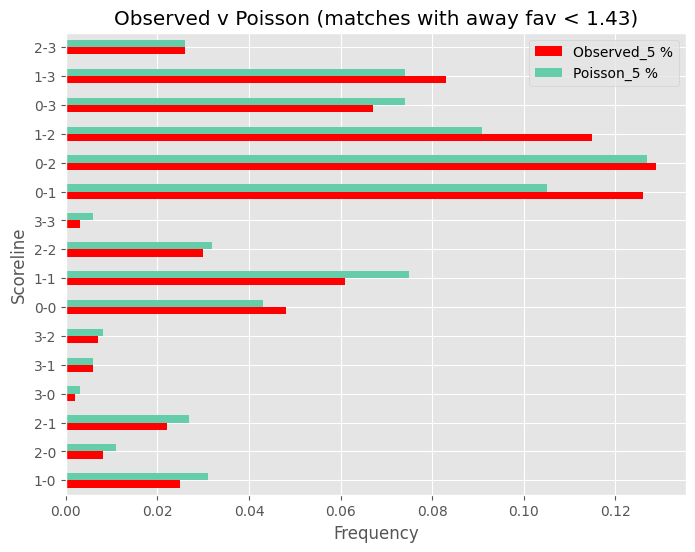

In [46]:
dfcomp_abfav.plot(x="Score", y=["Observed_5 %", "Poisson_5 %"], kind="barh", figsize=(8, 6), color=['Red','mediumaquamarine'])
plt.title('Observed v Poisson (matches with away fav < 1.43)')
plt.ylabel('Scoreline')
plt.xlabel('Frequency')
plt.show()

#### Observations
- Strong Poisson understate:  1-3, 1-2, 0-1, 
- Weak Poisson understate: 0-0
- Strong Poisson overstate:  0-3, 1-1, 1-0
- Weak Poisson overstate:  2-1
- Small sample size (1186) makes these observations less reliable but does correlate with home big fav 

### ________________________________________________________________________________________________________________________________________________

### Analysis of matches in range of 2.8 - 1.66

In [47]:
df_sfav = df[(df['HW_%'] < 0.60) & (df['AW_%'] < 0.60)]
df_sfav

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,HST,AST,HF,AF,...,TR,HW_%,X_%,AW_%,Ov2.5_%,Un2.5_%,Exp,HG_Exp,AG_Exp,Sup Exp
1,I1,21/08/2021,Verona,Sassuolo,2.0,3.0,4.0,8.0,11.0,12.0,...,1.0,0.37,0.28,0.36,0.52,0.48,2.76,1.41,1.38,0.03
2,I1,21/08/2021,Empoli,Lazio,1.0,3.0,5.0,5.0,13.0,10.0,...,0.0,0.20,0.24,0.55,0.56,0.44,2.94,0.94,1.97,-1.03
4,I1,22/08/2021,Bologna,Salernitana,3.0,2.0,7.0,4.0,13.0,15.0,...,3.0,0.58,0.24,0.19,0.53,0.47,2.79,1.95,0.86,1.09
7,I1,22/08/2021,Roma,Fiorentina,3.0,1.0,6.0,8.0,12.0,14.0,...,2.0,0.54,0.25,0.21,0.57,0.43,2.99,1.99,1.00,0.99
8,I1,23/08/2021,Cagliari,Spezia,2.0,2.0,10.0,6.0,17.0,17.0,...,0.0,0.48,0.26,0.25,0.52,0.48,2.76,1.68,1.05,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121843,E4,06/05/2006,Oxford,Leyton Orient,2.0,3.0,6.0,15.0,13.0,15.0,...,1.0,0.32,0.27,0.41,0.46,0.54,2.53,1.15,1.38,-0.23
121844,E4,06/05/2006,Peterboro,Wycombe,0.0,2.0,7.0,5.0,10.0,15.0,...,0.0,0.49,0.27,0.24,0.47,0.53,2.56,1.60,0.96,0.64
121845,E4,06/05/2006,Rushden & D,Barnet,1.0,2.0,1.0,5.0,15.0,21.0,...,0.0,0.32,0.28,0.40,0.46,0.54,2.53,1.16,1.37,-0.21
121846,E4,06/05/2006,Stockport,Carlisle,0.0,0.0,7.0,2.0,13.0,19.0,...,0.0,0.41,0.27,0.31,0.49,0.51,2.62,1.43,1.17,0.26


In [48]:
print('DF Dimension <0.60: ',df_sfav.shape)

DF Dimension <0.60:  (102843, 31)


In [49]:
# Basic stats of dataset
round(df_sfav.describe(),2)

,FTHG,FTAG,HST,AST,HF,AF,HC,AC,HY,AY,...,TR,HW_%,X_%,AW_%,Ov2.5_%,Un2.5_%,Exp,HG_Exp,AG_Exp,Sup Exp
count,102842.00,102842.00,66757.00,66757.0,65590.00,65590.00,66661.00,66661.00,67017.00,67018.00,...,67017.00,102843.00,102843.00,102843.00,102843.00,102843.00,102843.00,102843.00,102843.00,102843.00
mean,1.38,1.16,4.88,4.2,12.95,13.35,5.53,4.72,1.73,1.99,...,0.21,0.41,0.28,0.31,0.47,0.53,2.57,1.42,1.16,0.26
std,1.17,1.10,2.59,2.4,4.56,4.62,2.83,2.59,1.31,1.37,...,0.49,0.10,0.02,0.09,0.06,0.06,0.24,0.28,0.28,0.50
min,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.10,0.18,0.04,0.27,0.26,1.82,0.62,0.56,-1.48
25%,1.00,0.00,3.00,2.0,10.00,10.00,3.00,3.00,1.00,1.00,...,0.00,0.35,0.27,0.24,0.43,0.49,2.40,1.23,0.95,-0.03
50%,1.00,1.00,5.00,4.0,13.00,13.00,5.00,4.00,2.00,2.00,...,0.00,0.41,0.28,0.29,0.47,0.53,2.56,1.41,1.11,0.30
75%,2.00,2.00,6.00,6.0,16.00,16.00,7.00,6.00,3.00,3.00,...,0.00,0.48,0.29,0.36,0.51,0.57,2.71,1.60,1.30,0.62
max,9.00,9.00,21.00,20.0,48.00,77.00,24.00,21.00,11.00,9.00,...,10.00,0.59,0.77,0.59,0.74,0.73,3.82,2.65,2.63,1.48


In [50]:
Mean_sTG = df_sfav['TG'].mean()
STD_sTG = df_sfav['TG'].std()
Med_sTG = df_sfav['TG'].median()
Mean_sHG = df_sfav['FTHG'].mean()
Mean_sAG = df_sfav['FTAG'].mean()
print('Mean Total Goals (2.5 - 1.66):',round(Mean_sTG,2))
print('SD Total Goals (2.5 - 1.66):',round(STD_sTG,2))
print('Median Total Goals (2.5 - 1.66):',Med_sTG)
print('Mean Home Goals (2.5 - 1.66):',round(Mean_sHG,2))
print('Mean Away Goals (2.5 - 1.66):',round(Mean_sAG,2))

Mean Total Goals (2.5 - 1.66): 2.55
SD Total Goals (2.5 - 1.66): 1.61
Median Total Goals (2.5 - 1.66): 2.0
Mean Home Goals (2.5 - 1.66): 1.38
Mean Away Goals (2.5 - 1.66): 1.16


In [51]:
df_s1_0 = df_sfav[((df_sfav['FTHG'] == 1) & (df_sfav['FTAG'] == 0))]
df_s2_0 = df_sfav[((df_sfav['FTHG'] == 2) & (df_sfav['FTAG'] == 0))]
df_s2_1 = df_sfav[((df_sfav['FTHG'] == 2) & (df_sfav['FTAG'] == 1))]
df_s3_0 = df_sfav[((df_sfav['FTHG'] == 3) & (df_sfav['FTAG'] == 0))]
df_s3_1 = df_sfav[((df_sfav['FTHG'] == 3) & (df_sfav['FTAG'] == 1))]
df_s3_2 = df_sfav[((df_sfav['FTHG'] == 3) & (df_sfav['FTAG'] == 2))]

df_s0_0 = df_sfav[((df_sfav['FTHG'] == 0) & (df_sfav['FTAG'] == 0))]
df_s1_1 = df_sfav[((df_sfav['FTHG'] == 1) & (df_sfav['FTAG'] == 1))]
df_s2_2 = df_sfav[((df_sfav['FTHG'] == 2) & (df_sfav['FTAG'] == 2))]
df_s3_3 = df_sfav[((df_sfav['FTHG'] == 3) & (df_sfav['FTAG'] == 3))]
df_s4_4 = df_sfav[((df_sfav['FTHG'] == 4) & (df_sfav['FTAG'] == 4))]

df_s0_1 = df_sfav[((df_sfav['FTHG'] == 0) & (df_sfav['FTAG'] == 1))]
df_s0_2 = df_sfav[((df_sfav['FTHG'] == 0) & (df_sfav['FTAG'] == 2))]
df_s1_2 = df_sfav[((df_sfav['FTHG'] == 1) & (df_sfav['FTAG'] == 2))]
df_s0_3 = df_sfav[((df_sfav['FTHG'] == 0) & (df_sfav['FTAG'] == 3))]
df_s1_3 = df_sfav[((df_sfav['FTHG'] == 1) & (df_sfav['FTAG'] == 3))]
df_s2_3 = df_sfav[((df_sfav['FTHG'] == 2) & (df_sfav['FTAG'] == 3))]

print('Total games finishing 1-0: ', len(df_s1_0), '',round((len(df_s1_0)/len(df_sfav)),3))
print('Total games finishing 2-0: ', len(df_s2_0), '',round((len(df_s2_0)/len(df_sfav)),3))
print('Total games finishing 2-1: ', len(df_s2_1), '',round((len(df_s2_1)/len(df_sfav)),3))
print('Total games finishing 3-0: ', len(df_s3_0), '',round((len(df_s3_0)/len(df_sfav)),3))
print('Total games finishing 3-1: ', len(df_s3_1), '',round((len(df_s3_1)/len(df_sfav)),3))
print('Total games finishing 3-2: ', len(df_s3_2), '',round((len(df_s3_2)/len(df_sfav)),3))
print('')
print('Total games finishing 0-0: ', len(df_s0_0), '',round((len(df_s0_0)/len(df_sfav)),3))
print('Total games finishing 1-1: ', len(df_s1_1), '',round((len(df_s1_1)/len(df_sfav)),3))
print('Total games finishing 2-2: ', len(df_s2_2), '',round((len(df_s2_2)/len(df_sfav)),3))
print('Total games finishing 3-3: ', len(df_s3_3), '',round((len(df_s3_3)/len(df_sfav)),3))
print('Total games finishing 4-4: ', len(df_s4_4), ' ',round((len(df_s4_4)/len(df_sfav)),3))
print('')
print('Total games finishing 0-1: ', len(df_s0_1), '',round((len(df_s0_1)/len(df_sfav)),3))
print('Total games finishing 0-2: ', len(df_s0_2), '',round((len(df_s0_2)/len(df_sfav)),3))
print('Total games finishing 1-2: ', len(df_s1_2), '',round((len(df_s1_2)/len(df_sfav)),3))
print('Total games finishing 0-3: ', len(df_s0_3), '',round((len(df_s0_3)/len(df_sfav)),3))
print('Total games finishing 1-3: ', len(df_s1_3), '',round((len(df_s1_3)/len(df_sfav)),3))
print('Total games finishing 2-3: ', len(df_s2_3), '',round((len(df_s2_3)/len(df_sfav)),3))

Total games finishing 1-0:  11025  0.107
Total games finishing 2-0:  7577  0.074
Total games finishing 2-1:  9007  0.088
Total games finishing 3-0:  3517  0.034
Total games finishing 3-1:  3917  0.038
Total games finishing 3-2:  2443  0.024

Total games finishing 0-0:  8910  0.087
Total games finishing 1-1:  13683  0.133
Total games finishing 2-2:  5456  0.053
Total games finishing 3-3:  1012  0.01
Total games finishing 4-4:  101   0.001

Total games finishing 0-1:  8483  0.082
Total games finishing 0-2:  5072  0.049
Total games finishing 1-2:  7177  0.07
Total games finishing 0-3:  2155  0.021
Total games finishing 1-3:  2844  0.028
Total games finishing 2-3:  2010  0.02


In [52]:
avg_hg = df_sfav['FTHG'].mean()
avg_ag = df_sfav['FTAG'].mean()
avg_tg = df_sfav['TG'].mean()

score_1_0 = poisson.pmf(1, avg_hg) * poisson.pmf(0, avg_ag)
score_2_0 = poisson.pmf(2, avg_hg) * poisson.pmf(0, avg_ag)
score_2_1 = poisson.pmf(2, avg_hg) * poisson.pmf(1, avg_ag)
score_3_0 = poisson.pmf(3, avg_hg) * poisson.pmf(0, avg_ag)
score_3_1 = poisson.pmf(3, avg_hg) * poisson.pmf(1, avg_ag)
score_3_2 = poisson.pmf(3, avg_hg) * poisson.pmf(2, avg_ag)

score_0_0 = poisson.pmf(0, avg_hg) * poisson.pmf(0, avg_ag)
score_1_1 = poisson.pmf(1, avg_hg) * poisson.pmf(1, avg_ag)
score_2_2 = poisson.pmf(2, avg_hg) * poisson.pmf(2, avg_ag)
score_3_3 = poisson.pmf(3, avg_hg) * poisson.pmf(3, avg_ag)
score_4_4 = poisson.pmf(4, avg_hg) * poisson.pmf(4, avg_ag)


score_0_1 = poisson.pmf(0, avg_hg) * poisson.pmf(1, avg_ag)
score_0_2 = poisson.pmf(0, avg_hg) * poisson.pmf(2, avg_ag)
score_1_2 = poisson.pmf(1, avg_hg) * poisson.pmf(2, avg_ag)
score_0_3 = poisson.pmf(1, avg_hg) * poisson.pmf(3, avg_ag)
score_1_3 = poisson.pmf(1, avg_hg) * poisson.pmf(3, avg_ag)
score_2_3 = poisson.pmf(2, avg_hg) * poisson.pmf(3, avg_ag)

print('Poisson expected % of 1-0 from TOTAL matches: ',round(score_1_0,3))
print('Poisson expected % of 2-0 from TOTAL matches: ',round(score_2_0,3))
print('Poisson expected % of 2-1 from TOTAL matches: ',round(score_2_1,3))
print('Poisson expected % of 3-0 from TOTAL matches: ',round(score_3_0,3))
print('Poisson expected % of 3-1 from TOTAL matches: ',round(score_3_1,3))
print('Poisson expected % of 3-2 from TOTAL matches: ',round(score_3_2,3))
print('')
print('Poisson expected % of 0-0 from TOTAL matches: ',round(score_0_0,3))
print('Poisson expected % of 1-1 from TOTAL matches: ',round(score_1_1,3))
print('Poisson expected % of 2-2 from TOTAL matches: ',round(score_2_2,3))
print('Poisson expected % of 3-3 from TOTAL matches: ',round(score_3_3,3))
print('Poisson expected % of 4-4 from TOTAL matches: ',round(score_4_4,3))
print('')
print('Poisson expected % of 0-1 from TOTAL matches: ',round(score_0_1,3))
print('Poisson expected % of 0-2 from TOTAL matches: ',round(score_0_2,3))
print('Poisson expected % of 1-2 from TOTAL matches: ',round(score_1_2,3))
print('Poisson expected % of 0-3 from TOTAL matches: ',round(score_0_3,3))
print('Poisson expected % of 1-3 from TOTAL matches: ',round(score_1_3,3))
print('Poisson expected % of 2-3 from TOTAL matches: ',round(score_2_3,3))

Poisson expected % of 1-0 from TOTAL matches:  0.108
Poisson expected % of 2-0 from TOTAL matches:  0.075
Poisson expected % of 2-1 from TOTAL matches:  0.087
Poisson expected % of 3-0 from TOTAL matches:  0.034
Poisson expected % of 3-1 from TOTAL matches:  0.04
Poisson expected % of 3-2 from TOTAL matches:  0.023

Poisson expected % of 0-0 from TOTAL matches:  0.078
Poisson expected % of 1-1 from TOTAL matches:  0.126
Poisson expected % of 2-2 from TOTAL matches:  0.051
Poisson expected % of 3-3 from TOTAL matches:  0.009
Poisson expected % of 4-4 from TOTAL matches:  0.001

Poisson expected % of 0-1 from TOTAL matches:  0.091
Poisson expected % of 0-2 from TOTAL matches:  0.053
Poisson expected % of 1-2 from TOTAL matches:  0.073
Poisson expected % of 0-3 from TOTAL matches:  0.029
Poisson expected % of 1-3 from TOTAL matches:  0.029
Poisson expected % of 2-3 from TOTAL matches:  0.02


In [53]:
data =[['1-0',round((len(df_s1_0)/len(df_sfav)),3),round(score_1_0,3)],
       ['2-0',round((len(df_s2_0)/len(df_sfav)),3),round(score_2_0,3)],
       ['2-1',round((len(df_s2_1)/len(df_sfav)),3),round(score_2_1,3)],
       ['3-0',round((len(df_s3_0)/len(df_sfav)),3),round(score_3_0,3)],
       ['3-1',round((len(df_s3_1)/len(df_sfav)),3),round(score_3_1,3)],
       ['3-2',round((len(df_s3_2)/len(df_sfav)),3),round(score_3_2,3)],
       ['0-0',round((len(df_s0_0)/len(df_sfav)),3),round(score_0_0,3)],
       ['1-1',round((len(df_s1_1)/len(df_sfav)),3),round(score_1_1,3)],
       ['2-2',round((len(df_s2_2)/len(df_sfav)),3),round(score_2_2,3)],
       ['3-3',round((len(df_s3_3)/len(df_sfav)),3),round(score_3_3,3)],
      
       ['0-1',round((len(df_s0_1)/len(df_sfav)),3),round(score_0_1,3)],
       ['0-2',round((len(df_s0_2)/len(df_sfav)),3),round(score_0_2,3)],
       ['1-2',round((len(df_s1_2)/len(df_sfav)),3),round(score_1_2,3)],
       ['0-3',round((len(df_s0_3)/len(df_sfav)),3),round(score_0_3,3)],
       ['1-3',round((len(df_s1_3)/len(df_sfav)),3),round(score_1_3,3)],
       ['2-3',round((len(df_s2_3)/len(df_sfav)),3),round(score_2_3,3)]
      ]

dfcomp_sfav = pd.DataFrame(data, columns=['Score', 'Observed_6 %', 'Poisson_6 %'])
dfcomp_sfav['diff_6']=dfcomp_sfav['Observed_6 %']-dfcomp_sfav['Poisson_6 %']
dfcomp_sfav

,Score,Observed_6 %,Poisson_6 %,diff_6
0,1-0,0.107,0.108,-0.001
1,2-0,0.074,0.075,-0.001
2,2-1,0.088,0.087,0.001
3,3-0,0.034,0.034,0.000
4,3-1,0.038,0.040,-0.002
5,3-2,0.024,0.023,0.001
6,0-0,0.087,0.078,0.009
7,1-1,0.133,0.126,0.007
8,2-2,0.053,0.051,0.002
9,3-3,0.010,0.009,0.001


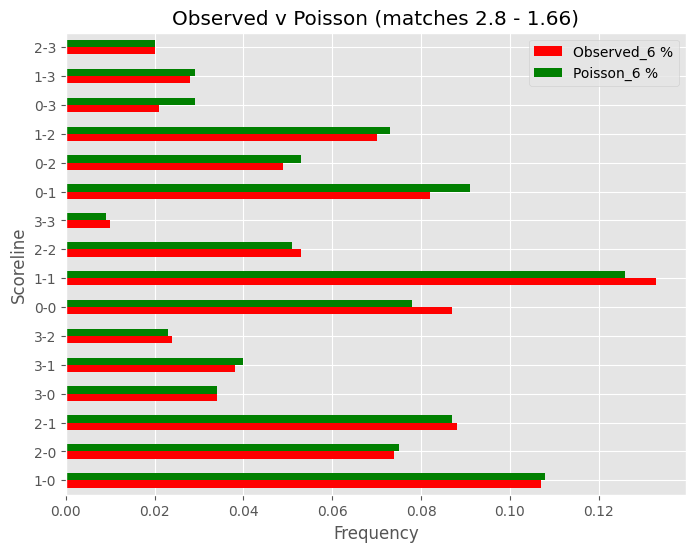

In [54]:
dfcomp_sfav.plot(x="Score", y=["Observed_6 %", "Poisson_6 %"], kind="barh", figsize=(8, 6), color=['Red','green'])
plt.title('Observed v Poisson (matches 2.8 - 1.66)')
plt.ylabel('Scoreline')
plt.xlabel('Frequency')
plt.show()

#### Observations
- Strong Poisson understate: 1-1, 0-0,   
- Weak Poisson understate:  2-2,
- Strong Poisson overstate: 0-3, 0-1,
- Weak Poisson overstate:  1-2, 

### ________________________________________________________________________________________________________________________________________________

### Collate the supremacy differences for easier comparison

In [55]:
# Reverse the scores for away fav/big fav collated tables so all can be merged consistently 
dfcomp_afav['Score'] = dfcomp_afav.loc[:,'Score'].apply(lambda x: x[::-1])
dfcomp_abfav['Score'] = dfcomp_abfav.loc[:,'Score'].apply(lambda x: x[::-1])

In [60]:
df_collated = pd.merge(dfcomp, dfcomp_hfav, on=['Score'])
df_collated = pd.merge(df_collated, dfcomp_afav, on=['Score'])
df_collated = pd.merge(df_collated, dfcomp_hbfav, on=['Score'])
df_collated = pd.merge(df_collated, dfcomp_abfav, on=['Score'])
df_collated = pd.merge(df_collated, dfcomp_sfav, on=['Score'])

df_collated = df_collated[['Score', 'diff_1', 'diff_6' , 'diff_2', 'diff_3', 'diff_4', 'diff_5']]
df_collated = df_collated.rename(columns={'diff_1':'All Matches', 'diff_6': 'Matches > 1.66', 'diff_2':'H_Fav < 1.66', 'diff_3':'A_Fav < 1.66', 'diff_4':'H_Fav < 1.33', 'diff_5': 'A_Fav < 1.43' })



#### Table showing % difference between poisson and actual scores given varying supremacies 

In [61]:
df_collated

,Score,All Matches,Matches > 1.66,H_Fav < 1.66,A_Fav < 1.66,H_Fav < 1.33,A_Fav < 1.43
0,1-0,-0.001,-0.001,0.008,0.016,0.014,0.021
1,2-0,0.000,-0.001,0.004,-0.002,0.006,0.002
2,2-1,-0.002,0.001,0.011,0.017,0.016,0.024
3,3-0,0.001,0.000,-0.003,0.005,-0.002,-0.007
4,3-1,-0.003,-0.002,0.000,0.000,0.004,0.009
5,3-2,-0.001,0.001,0.003,0.003,0.005,0.000
6,0-0,0.008,0.009,-0.003,-0.003,-0.010,0.005
7,1-1,0.002,0.007,-0.004,-0.008,-0.008,-0.014
8,2-2,-0.001,0.002,0.004,0.003,0.002,-0.002
9,3-3,-0.001,0.001,0.000,-0.001,0.000,-0.003


### ____________________________________________________________________________________________________________________________________________________

## Conclusion
##### (13/3/2023)

Some significant and some minor adjustments to poisson calculations will need to be made. Initially to consist of: 

1. Increase 0-0 and 1-1 poisson for mid-price matches (fav > 1.66) - by ~70% of analysis difference (-0.6% and -0.5% respectively)
2. Reduce 0-1 poisson for all matches by ~70% of analysis difference (+0.6%)
3. Reduce 0-3 poisson for non fav matches - by ~70% of analysis difference (+0.6%) - Ignore for fav matches
4. Increase 1-0, 2-1 for big fav matches (fav < 1.66) - by ~ 50% of analysis difference (-0.5%)
5. No extra adjustments needed for very short price favs ( <1.25) on top of those done already done for <1.66
 
Provisional adjustments to be made and checked against current and market prices
